# 와인 분류 

In [23]:
import pandas as pd
import numpy as np
import tensorflow as tf

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

from sklearn.model_selection import train_test_split

import matplotlib.pyplot as plt
import seaborn as sns


np.random.seed(0)
tf.random.set_seed(0)

In [69]:
df_pre=pd.read_csv("wine.csv",header=None)
df=df_pre.sample(frac=1) #샘플 가져오기 frac : 부분 (frac=1 은 전체)

In [96]:
df_pre.sample(frac=0.5) 

,0,1,2,3,4,5,6,7,8,9,10,11,12
5773,6.3,0.24,0.22,11.90,0.050,65.0,179.0,0.99659,3.06,0.58,9.3,6,0
5043,6.7,0.30,0.44,18.75,0.057,65.0,224.0,0.99956,3.11,0.53,9.1,5,0
4555,8.1,0.12,0.38,0.90,0.034,36.0,86.0,0.99026,2.80,0.55,12.0,6,0
1753,8.2,0.23,0.40,7.50,0.049,12.0,76.0,0.99660,3.06,0.84,9.7,6,0
4799,5.2,0.31,0.36,5.10,0.031,46.0,145.0,0.98970,3.14,0.31,12.4,7,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1877,6.8,0.32,0.34,1.20,0.044,14.0,67.0,0.99190,3.05,0.47,10.6,4,0
4075,6.8,0.29,0.49,1.40,0.142,52.0,148.0,0.99370,3.08,0.49,9.0,6,0
628,8.7,0.54,0.26,2.50,0.097,7.0,31.0,0.99760,3.27,0.60,9.3,6,1
2350,6.9,0.20,0.50,10.00,0.036,78.0,167.0,0.99640,3.15,0.55,10.2,6,0


In [70]:
df

,0,1,2,3,4,5,6,7,8,9,10,11,12
5316,6.3,0.18,0.24,3.4,0.053,20.0,119.0,0.99373,3.11,0.52,9.2,6,0
5210,6.8,0.14,0.18,1.4,0.047,30.0,90.0,0.99164,3.27,0.54,11.2,6,0
3518,7.3,0.22,0.50,13.7,0.049,56.0,189.0,0.99940,3.24,0.66,9.0,6,0
1622,7.6,0.67,0.14,1.5,0.074,25.0,168.0,0.99370,3.05,0.51,9.3,5,0
2443,7.3,0.21,0.29,1.6,0.034,29.0,118.0,0.99170,3.30,0.50,11.0,8,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4931,6.5,0.22,0.28,3.7,0.059,29.0,151.0,0.99177,3.23,0.41,12.1,7,0
3264,6.5,0.13,0.37,1.0,0.036,48.0,114.0,0.99110,3.41,0.51,11.5,8,0
1653,6.8,0.20,0.59,0.9,0.147,38.0,132.0,0.99300,3.05,0.38,9.1,6,0
2607,6.6,0.22,0.37,1.2,0.059,45.0,199.0,0.99300,3.37,0.55,10.3,7,0


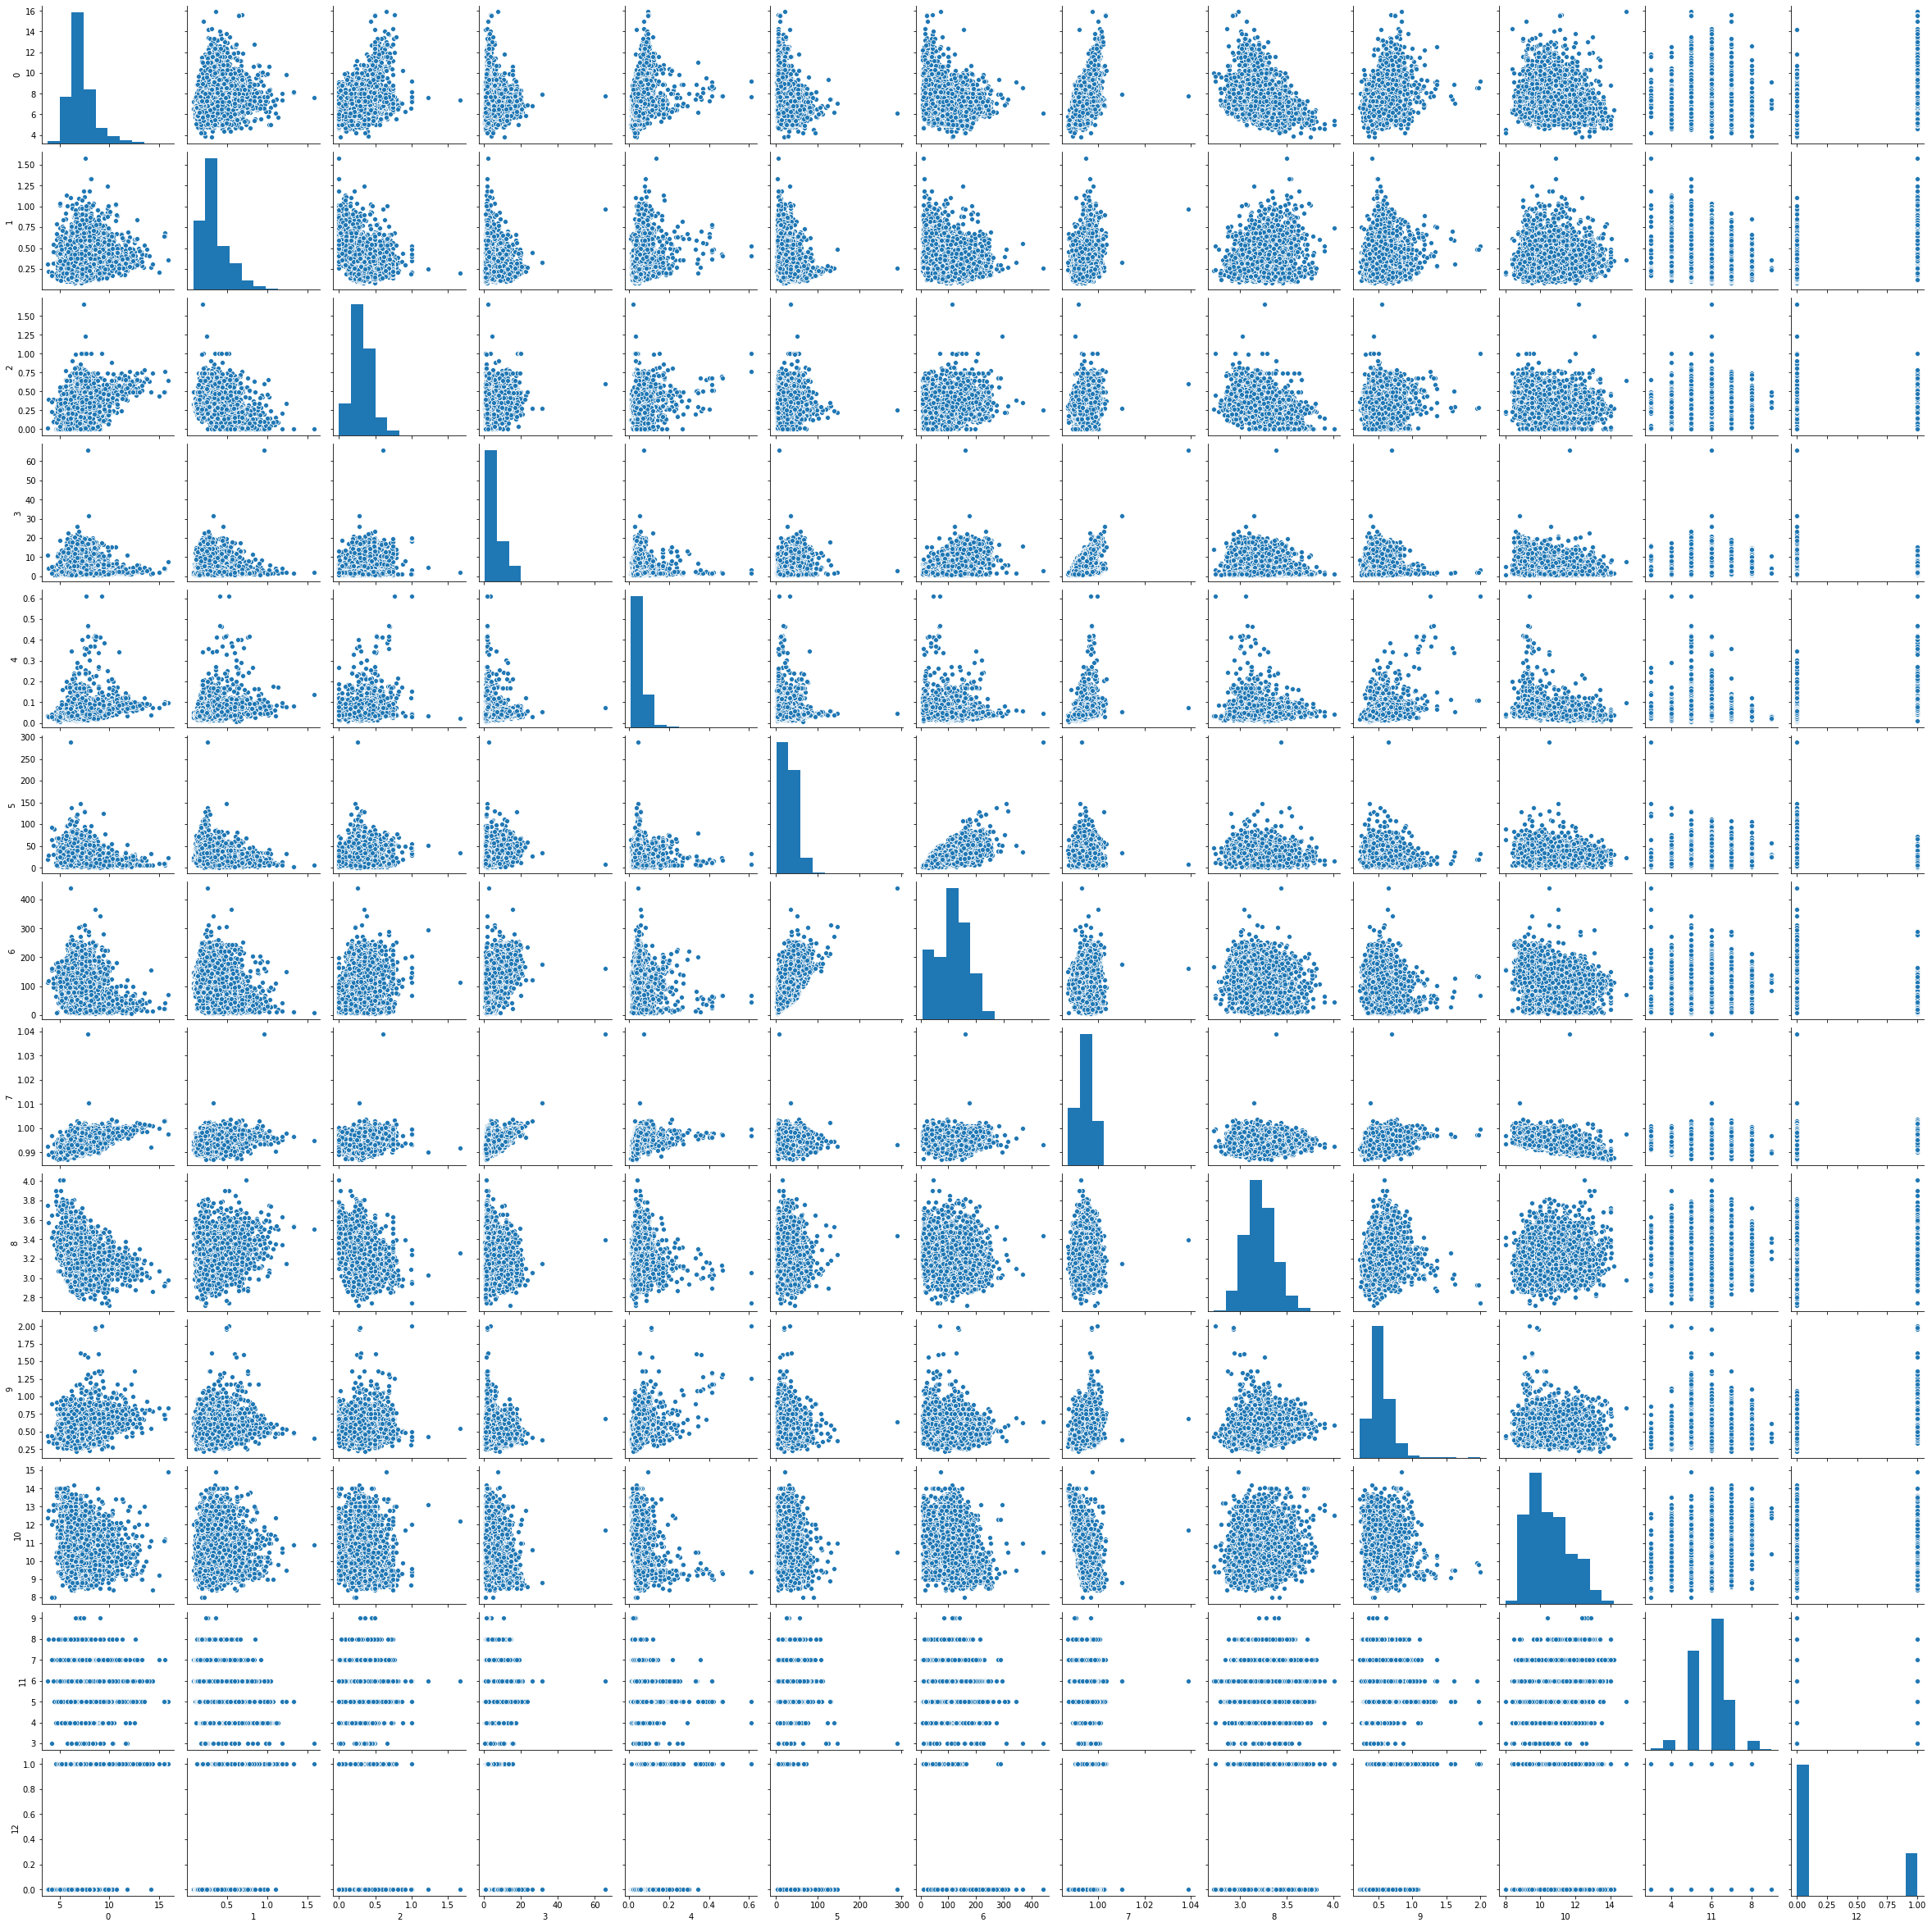

In [22]:
sns.pairplot(df)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6497 entries, 6265 to 5931
Data columns (total 13 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       6497 non-null   float64
 1   1       6497 non-null   float64
 2   2       6497 non-null   float64
 3   3       6497 non-null   float64
 4   4       6497 non-null   float64
 5   5       6497 non-null   float64
 6   6       6497 non-null   float64
 7   7       6497 non-null   float64
 8   8       6497 non-null   float64
 9   9       6497 non-null   float64
 10  10      6497 non-null   float64
 11  11      6497 non-null   int64  
 12  12      6497 non-null   int64  
dtypes: float64(11), int64(2)
memory usage: 710.6 KB


In [71]:
dataset=df.values

In [72]:
dataset.shape

(6497, 13)

In [73]:
X=dataset[:,:-1]
Y=dataset[:,[-1]]

In [74]:
X.shape,Y.shape

((6497, 12), (6497, 1))

In [75]:
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.3,random_state=0)

In [76]:
X_train.shape

(4547, 12)

In [77]:
Y_train.shape

(4547, 1)

In [78]:
model=Sequential()
model.add(Dense(30,input_dim=12,activation='relu'))
model.add(Dense(12,activation='relu'))
model.add(Dense(8,activation='relu'))
model.add(Dense(1,activation='sigmoid'))


model.compile(loss="binary_crossentropy",optimizer="adam",metrics=['accuracy'])

In [80]:
model.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_18 (Dense)             (None, 30)                390       
_________________________________________________________________
dense_19 (Dense)             (None, 12)                372       
_________________________________________________________________
dense_20 (Dense)             (None, 8)                 104       
_________________________________________________________________
dense_21 (Dense)             (None, 1)                 9         
Total params: 875
Trainable params: 875
Non-trainable params: 0
_________________________________________________________________


In [63]:
model.fit(X_train,Y_train,epochs=200,batch_size=200)

Epoch 1/200
23/23 [==============================] - 0s 783us/step - loss: 2.9967 - accuracy: 0.3492
Epoch 2/200
23/23 [==============================] - 0s 694us/step - loss: 0.4509 - accuracy: 0.7510
Epoch 3/200
23/23 [==============================] - 0s 694us/step - loss: 0.4275 - accuracy: 0.7519
Epoch 4/200
23/23 [==============================] - 0s 740us/step - loss: 0.4020 - accuracy: 0.7645
Epoch 5/200
23/23 [==============================] - 0s 802us/step - loss: 0.3694 - accuracy: 0.7961
Epoch 6/200
23/23 [==============================] - 0s 795us/step - loss: 0.3065 - accuracy: 0.8568
Epoch 7/200
23/23 [==============================] - 0s 696us/step - loss: 0.2429 - accuracy: 0.9109
Epoch 8/200
23/23 [==============================] - 0s 832us/step - loss: 0.2233 - accuracy: 0.9228
Epoch 9/200
23/23 [==============================] - 0s 754us/step - loss: 0.2178 - accuracy: 0.9239
Epoch 10/200
23/23 [==============================] - 0s 793us/step - loss: 0.2157 - accura

Epoch 81/200
23/23 [==============================] - 0s 735us/step - loss: 0.0634 - accuracy: 0.9802
Epoch 82/200
23/23 [==============================] - 0s 725us/step - loss: 0.0666 - accuracy: 0.9782
Epoch 83/200
23/23 [==============================] - 0s 701us/step - loss: 0.0602 - accuracy: 0.9822
Epoch 84/200
23/23 [==============================] - 0s 738us/step - loss: 0.0610 - accuracy: 0.9798
Epoch 85/200
23/23 [==============================] - 0s 698us/step - loss: 0.0592 - accuracy: 0.9813
Epoch 86/200
23/23 [==============================] - 0s 688us/step - loss: 0.0595 - accuracy: 0.9811
Epoch 87/200
23/23 [==============================] - 0s 781us/step - loss: 0.0584 - accuracy: 0.9809
Epoch 88/200
23/23 [==============================] - 0s 720us/step - loss: 0.0596 - accuracy: 0.9804
Epoch 89/200
23/23 [==============================] - 0s 772us/step - loss: 0.0600 - accuracy: 0.9789
Epoch 90/200
23/23 [==============================] - 0s 771us/step - loss: 0.0606

23/23 [==============================] - 0s 783us/step - loss: 0.0511 - accuracy: 0.9850
Epoch 161/200
23/23 [==============================] - 0s 696us/step - loss: 0.0615 - accuracy: 0.9813
Epoch 162/200
23/23 [==============================] - 0s 687us/step - loss: 0.0503 - accuracy: 0.9837
Epoch 163/200
23/23 [==============================] - 0s 762us/step - loss: 0.0475 - accuracy: 0.9850
Epoch 164/200
23/23 [==============================] - 0s 768us/step - loss: 0.0519 - accuracy: 0.9828
Epoch 165/200
23/23 [==============================] - 0s 778us/step - loss: 0.0618 - accuracy: 0.9804
Epoch 166/200
23/23 [==============================] - 0s 717us/step - loss: 0.0542 - accuracy: 0.9831
Epoch 167/200
23/23 [==============================] - 0s 738us/step - loss: 0.0456 - accuracy: 0.9868
Epoch 168/200
23/23 [==============================] - 0s 778us/step - loss: 0.0462 - accuracy: 0.9872
Epoch 169/200
23/23 [==============================] - 0s 781us/step - loss: 0.0476 - a

In [64]:
model.evaluate(X_test,Y_test)

61/61 [==============================] - 0s 487us/step - loss: 0.0707 - accuracy: 0.9836


[0.0706804171204567, 0.983589768409729]

# 콜백과 체크포인트

In [97]:
X=dataset[:,:-1]
Y=dataset[:,[-1]]

In [98]:
model=Sequential()
model.add(Dense(30,input_dim=12,activation='relu'))
model.add(Dense(12,activation='relu'))
model.add(Dense(8,activation='relu'))
model.add(Dense(1,activation='sigmoid'))


model.compile(loss="binary_crossentropy",optimizer="adam",metrics=['accuracy'])

In [107]:
import os
MODEL_DIR='./model/'
if not os.path.exists(MODEL_DIR):
    os.mkdir(MODEL_DIR)
    
modelpath="./model/{epoch:02d}-{val_loss:.4f}.hdf5"

In [108]:
# callbacks : 스레드 처럼, 메인프로그램과 독자적으로 돌아가다가, 특정 조건에 맞는 이벤트가 발생하면, 미리 정해둔 작업을 행한다
# 메인이 되는 코드는 학습만 하게! , 콜백으로는 원하는 작업을!

from tensorflow.keras.callbacks import ModelCheckpoint

In [109]:
checkpointer=ModelCheckpoint(filepath=modelpath,monitor='val_loss',verbose=1,save_best_only=True) #val_loss가 줄어들때만 저장

In [110]:
model.fit(X,Y,validation_split=0.2,epochs=200,batch_size=200,verbose=0,callbacks=[checkpointer]) #validation_split : 검증욧 셋을 자동으로 나눠줌


Epoch 00001: val_loss improved from inf to 0.27568, saving model to ./model\01-0.2757.hdf5

Epoch 00002: val_loss improved from 0.27568 to 0.23420, saving model to ./model\02-0.2342.hdf5

Epoch 00003: val_loss improved from 0.23420 to 0.21828, saving model to ./model\03-0.2183.hdf5

Epoch 00004: val_loss improved from 0.21828 to 0.21121, saving model to ./model\04-0.2112.hdf5

Epoch 00005: val_loss improved from 0.21121 to 0.20561, saving model to ./model\05-0.2056.hdf5

Epoch 00006: val_loss improved from 0.20561 to 0.20299, saving model to ./model\06-0.2030.hdf5

Epoch 00007: val_loss improved from 0.20299 to 0.19927, saving model to ./model\07-0.1993.hdf5

Epoch 00008: val_loss did not improve from 0.19927

Epoch 00009: val_loss improved from 0.19927 to 0.19460, saving model to ./model\09-0.1946.hdf5

Epoch 00010: val_loss did not improve from 0.19460

Epoch 00011: val_loss improved from 0.19460 to 0.19100, saving model to ./model\11-0.1910.hdf5

Epoch 00012: val_loss improved from


Epoch 00103: val_loss did not improve from 0.05915

Epoch 00104: val_loss did not improve from 0.05915

Epoch 00105: val_loss did not improve from 0.05915

Epoch 00106: val_loss improved from 0.05915 to 0.05821, saving model to ./model\106-0.0582.hdf5

Epoch 00107: val_loss did not improve from 0.05821

Epoch 00108: val_loss improved from 0.05821 to 0.05814, saving model to ./model\108-0.0581.hdf5

Epoch 00109: val_loss improved from 0.05814 to 0.05803, saving model to ./model\109-0.0580.hdf5

Epoch 00110: val_loss did not improve from 0.05803

Epoch 00111: val_loss did not improve from 0.05803

Epoch 00112: val_loss did not improve from 0.05803

Epoch 00113: val_loss improved from 0.05803 to 0.05675, saving model to ./model\113-0.0568.hdf5

Epoch 00114: val_loss did not improve from 0.05675

Epoch 00115: val_loss did not improve from 0.05675

Epoch 00116: val_loss did not improve from 0.05675

Epoch 00117: val_loss improved from 0.05675 to 0.05614, saving model to ./model\117-0.0561.

## 적절한 에포크 설정을 위해 그래프로 확인



 - 학습셋에 과적합하면 val의 오차가 커짐
 
 - 특정 에포크 이상에서 val의 오차가 커지면 멈추자!


In [131]:
# df=df_pre.sample(frac=0.15)

X=dataset[:,:-1]
Y=dataset[:,[-1]]

In [132]:
model=Sequential()
model.add(Dense(30,input_dim=12,activation='relu'))
model.add(Dense(12,activation='relu'))
model.add(Dense(8,activation='relu'))
model.add(Dense(1,activation='sigmoid'))


model.compile(loss="binary_crossentropy",optimizer="adam",metrics=['accuracy'])

Epoch 1/3500
9/9 [==============================] - 0s 12ms/step - loss: 0.5664 - accuracy: 0.7583 - val_loss: 0.3746 - val_accuracy: 0.8280
Epoch 2/3500
9/9 [==============================] - 0s 2ms/step - loss: 0.3891 - accuracy: 0.8293 - val_loss: 0.2937 - val_accuracy: 0.8821
Epoch 3/3500
9/9 [==============================] - 0s 2ms/step - loss: 0.3134 - accuracy: 0.8821 - val_loss: 0.2455 - val_accuracy: 0.9086
Epoch 4/3500
9/9 [==============================] - 0s 2ms/step - loss: 0.2672 - accuracy: 0.9049 - val_loss: 0.2280 - val_accuracy: 0.9329
Epoch 5/3500
9/9 [==============================] - 0s 2ms/step - loss: 0.2417 - accuracy: 0.9189 - val_loss: 0.1969 - val_accuracy: 0.9399
Epoch 6/3500
9/9 [==============================] - 0s 2ms/step - loss: 0.2151 - accuracy: 0.9318 - val_loss: 0.1750 - val_accuracy: 0.9399
Epoch 7/3500
9/9 [==============================] - 0s 2ms/step - loss: 0.1937 - accuracy: 0.9347 - val_loss: 0.1681 - val_accuracy: 0.9422
Epoch 8/3500
9/9 [=

9/9 [==============================] - 0s 3ms/step - loss: 0.0917 - accuracy: 0.9717 - val_loss: 0.0866 - val_accuracy: 0.9702
Epoch 60/3500
9/9 [==============================] - 0s 3ms/step - loss: 0.0891 - accuracy: 0.9729 - val_loss: 0.0844 - val_accuracy: 0.9748
Epoch 61/3500
9/9 [==============================] - 0s 3ms/step - loss: 0.0883 - accuracy: 0.9731 - val_loss: 0.0878 - val_accuracy: 0.9786
Epoch 62/3500
9/9 [==============================] - 0s 3ms/step - loss: 0.0892 - accuracy: 0.9745 - val_loss: 0.0899 - val_accuracy: 0.9697
Epoch 63/3500
9/9 [==============================] - 0s 2ms/step - loss: 0.0906 - accuracy: 0.9715 - val_loss: 0.0841 - val_accuracy: 0.9725
Epoch 64/3500
9/9 [==============================] - 0s 2ms/step - loss: 0.0892 - accuracy: 0.9736 - val_loss: 0.0913 - val_accuracy: 0.9748
Epoch 65/3500
9/9 [==============================] - 0s 2ms/step - loss: 0.0844 - accuracy: 0.9770 - val_loss: 0.0866 - val_accuracy: 0.9786
Epoch 66/3500
9/9 [========

9/9 [==============================] - 0s 2ms/step - loss: 0.0661 - accuracy: 0.9841 - val_loss: 0.0656 - val_accuracy: 0.9832
Epoch 117/3500
9/9 [==============================] - 0s 3ms/step - loss: 0.0688 - accuracy: 0.9814 - val_loss: 0.0737 - val_accuracy: 0.9786
Epoch 118/3500
9/9 [==============================] - 0s 2ms/step - loss: 0.0654 - accuracy: 0.9830 - val_loss: 0.0652 - val_accuracy: 0.9823
Epoch 119/3500
9/9 [==============================] - 0s 2ms/step - loss: 0.0647 - accuracy: 0.9837 - val_loss: 0.0670 - val_accuracy: 0.9800
Epoch 120/3500
9/9 [==============================] - 0s 2ms/step - loss: 0.0662 - accuracy: 0.9818 - val_loss: 0.0651 - val_accuracy: 0.9828
Epoch 121/3500
9/9 [==============================] - 0s 2ms/step - loss: 0.0644 - accuracy: 0.9832 - val_loss: 0.0696 - val_accuracy: 0.9790
Epoch 122/3500
9/9 [==============================] - 0s 2ms/step - loss: 0.0642 - accuracy: 0.9841 - val_loss: 0.0691 - val_accuracy: 0.9786
Epoch 123/3500
9/9 [=

Epoch 174/3500
9/9 [==============================] - 0s 2ms/step - loss: 0.0556 - accuracy: 0.9853 - val_loss: 0.0595 - val_accuracy: 0.9841
Epoch 175/3500
9/9 [==============================] - 0s 2ms/step - loss: 0.0563 - accuracy: 0.9855 - val_loss: 0.0591 - val_accuracy: 0.9851
Epoch 176/3500
9/9 [==============================] - 0s 2ms/step - loss: 0.0596 - accuracy: 0.9837 - val_loss: 0.0634 - val_accuracy: 0.9823
Epoch 177/3500
9/9 [==============================] - 0s 2ms/step - loss: 0.0619 - accuracy: 0.9812 - val_loss: 0.0611 - val_accuracy: 0.9832
Epoch 178/3500
9/9 [==============================] - 0s 2ms/step - loss: 0.0636 - accuracy: 0.9830 - val_loss: 0.0602 - val_accuracy: 0.9818
Epoch 179/3500
9/9 [==============================] - 0s 2ms/step - loss: 0.0627 - accuracy: 0.9818 - val_loss: 0.0618 - val_accuracy: 0.9823
Epoch 180/3500
9/9 [==============================] - 0s 2ms/step - loss: 0.0562 - accuracy: 0.9858 - val_loss: 0.0647 - val_accuracy: 0.9823
Epoch 

Epoch 232/3500
9/9 [==============================] - 0s 2ms/step - loss: 0.0556 - accuracy: 0.9841 - val_loss: 0.0594 - val_accuracy: 0.9828
Epoch 233/3500
9/9 [==============================] - 0s 2ms/step - loss: 0.0578 - accuracy: 0.9864 - val_loss: 0.0581 - val_accuracy: 0.9846
Epoch 234/3500
9/9 [==============================] - 0s 3ms/step - loss: 0.0574 - accuracy: 0.9855 - val_loss: 0.0558 - val_accuracy: 0.9865
Epoch 235/3500
9/9 [==============================] - 0s 2ms/step - loss: 0.0611 - accuracy: 0.9835 - val_loss: 0.0589 - val_accuracy: 0.9841
Epoch 236/3500
9/9 [==============================] - 0s 2ms/step - loss: 0.0519 - accuracy: 0.9862 - val_loss: 0.0561 - val_accuracy: 0.9865
Epoch 237/3500
9/9 [==============================] - 0s 2ms/step - loss: 0.0547 - accuracy: 0.9848 - val_loss: 0.0673 - val_accuracy: 0.9814
Epoch 238/3500
9/9 [==============================] - 0s 2ms/step - loss: 0.0535 - accuracy: 0.9864 - val_loss: 0.0579 - val_accuracy: 0.9846
Epoch 

Epoch 290/3500
9/9 [==============================] - 0s 2ms/step - loss: 0.0526 - accuracy: 0.9851 - val_loss: 0.0567 - val_accuracy: 0.9851
Epoch 291/3500
9/9 [==============================] - 0s 2ms/step - loss: 0.0493 - accuracy: 0.9869 - val_loss: 0.0546 - val_accuracy: 0.9846
Epoch 292/3500
9/9 [==============================] - 0s 3ms/step - loss: 0.0495 - accuracy: 0.9862 - val_loss: 0.0542 - val_accuracy: 0.9855
Epoch 293/3500
9/9 [==============================] - 0s 2ms/step - loss: 0.0501 - accuracy: 0.9871 - val_loss: 0.0548 - val_accuracy: 0.9851
Epoch 294/3500
9/9 [==============================] - 0s 2ms/step - loss: 0.0501 - accuracy: 0.9858 - val_loss: 0.0553 - val_accuracy: 0.9851
Epoch 295/3500
9/9 [==============================] - 0s 2ms/step - loss: 0.0503 - accuracy: 0.9864 - val_loss: 0.0532 - val_accuracy: 0.9874
Epoch 296/3500
9/9 [==============================] - 0s 2ms/step - loss: 0.0487 - accuracy: 0.9874 - val_loss: 0.0537 - val_accuracy: 0.9874
Epoch 

Epoch 348/3500
9/9 [==============================] - 0s 2ms/step - loss: 0.0466 - accuracy: 0.9883 - val_loss: 0.0537 - val_accuracy: 0.9874
Epoch 349/3500
9/9 [==============================] - ETA: 0s - loss: 0.0562 - accuracy: 0.98 - 0s 2ms/step - loss: 0.0490 - accuracy: 0.9874 - val_loss: 0.0596 - val_accuracy: 0.9837
Epoch 350/3500
9/9 [==============================] - 0s 2ms/step - loss: 0.0583 - accuracy: 0.9851 - val_loss: 0.0624 - val_accuracy: 0.9823
Epoch 351/3500
9/9 [==============================] - 0s 2ms/step - loss: 0.0580 - accuracy: 0.9853 - val_loss: 0.0543 - val_accuracy: 0.9874
Epoch 352/3500
9/9 [==============================] - 0s 2ms/step - loss: 0.0471 - accuracy: 0.9869 - val_loss: 0.0555 - val_accuracy: 0.9851
Epoch 353/3500
9/9 [==============================] - 0s 2ms/step - loss: 0.0464 - accuracy: 0.9874 - val_loss: 0.0519 - val_accuracy: 0.9865
Epoch 354/3500
9/9 [==============================] - 0s 2ms/step - loss: 0.0461 - accuracy: 0.9883 - val_

9/9 [==============================] - 0s 2ms/step - loss: 0.0477 - accuracy: 0.9871 - val_loss: 0.0561 - val_accuracy: 0.9855
Epoch 406/3500
9/9 [==============================] - 0s 2ms/step - loss: 0.0456 - accuracy: 0.9887 - val_loss: 0.0516 - val_accuracy: 0.9860
Epoch 407/3500
9/9 [==============================] - 0s 2ms/step - loss: 0.0453 - accuracy: 0.9887 - val_loss: 0.0512 - val_accuracy: 0.9869
Epoch 408/3500
9/9 [==============================] - 0s 2ms/step - loss: 0.0446 - accuracy: 0.9894 - val_loss: 0.0725 - val_accuracy: 0.9772
Epoch 409/3500
9/9 [==============================] - 0s 2ms/step - loss: 0.0506 - accuracy: 0.9860 - val_loss: 0.0553 - val_accuracy: 0.9860
Epoch 410/3500
9/9 [==============================] - 0s 2ms/step - loss: 0.0507 - accuracy: 0.9848 - val_loss: 0.0511 - val_accuracy: 0.9869
Epoch 411/3500
9/9 [==============================] - 0s 3ms/step - loss: 0.0533 - accuracy: 0.9855 - val_loss: 0.0521 - val_accuracy: 0.9879
Epoch 412/3500
9/9 [=

9/9 [==============================] - 0s 3ms/step - loss: 0.0478 - accuracy: 0.9869 - val_loss: 0.0583 - val_accuracy: 0.9851
Epoch 463/3500
9/9 [==============================] - 0s 2ms/step - loss: 0.0467 - accuracy: 0.9867 - val_loss: 0.0509 - val_accuracy: 0.9883
Epoch 464/3500
9/9 [==============================] - 0s 2ms/step - loss: 0.0451 - accuracy: 0.9871 - val_loss: 0.0513 - val_accuracy: 0.9888
Epoch 465/3500
9/9 [==============================] - 0s 2ms/step - loss: 0.0463 - accuracy: 0.9878 - val_loss: 0.0506 - val_accuracy: 0.9883
Epoch 466/3500
9/9 [==============================] - 0s 2ms/step - loss: 0.0453 - accuracy: 0.9876 - val_loss: 0.0520 - val_accuracy: 0.9869
Epoch 467/3500
9/9 [==============================] - ETA: 0s - loss: 0.0508 - accuracy: 0.98 - 0s 2ms/step - loss: 0.0439 - accuracy: 0.9883 - val_loss: 0.0574 - val_accuracy: 0.9860
Epoch 468/3500
9/9 [==============================] - 0s 2ms/step - loss: 0.0461 - accuracy: 0.9881 - val_loss: 0.0500 - 

9/9 [==============================] - 0s 2ms/step - loss: 0.0432 - accuracy: 0.9887 - val_loss: 0.0501 - val_accuracy: 0.9879
Epoch 520/3500
9/9 [==============================] - 0s 2ms/step - loss: 0.0446 - accuracy: 0.9890 - val_loss: 0.0571 - val_accuracy: 0.9860
Epoch 521/3500
9/9 [==============================] - 0s 3ms/step - loss: 0.0475 - accuracy: 0.9862 - val_loss: 0.0521 - val_accuracy: 0.9874
Epoch 522/3500
9/9 [==============================] - 0s 2ms/step - loss: 0.0449 - accuracy: 0.9887 - val_loss: 0.0518 - val_accuracy: 0.9865
Epoch 523/3500
9/9 [==============================] - 0s 2ms/step - loss: 0.0466 - accuracy: 0.9874 - val_loss: 0.0499 - val_accuracy: 0.9893
Epoch 524/3500
9/9 [==============================] - 0s 2ms/step - loss: 0.0425 - accuracy: 0.9899 - val_loss: 0.0516 - val_accuracy: 0.9888
Epoch 525/3500
9/9 [==============================] - 0s 3ms/step - loss: 0.0450 - accuracy: 0.9867 - val_loss: 0.0517 - val_accuracy: 0.9855
Epoch 526/3500
9/9 [=

Epoch 577/3500
9/9 [==============================] - 0s 2ms/step - loss: 0.0480 - accuracy: 0.9864 - val_loss: 0.0543 - val_accuracy: 0.9860
Epoch 578/3500
9/9 [==============================] - 0s 2ms/step - loss: 0.0463 - accuracy: 0.9890 - val_loss: 0.0531 - val_accuracy: 0.9874
Epoch 579/3500
9/9 [==============================] - 0s 2ms/step - loss: 0.0493 - accuracy: 0.9864 - val_loss: 0.0553 - val_accuracy: 0.9855
Epoch 580/3500
9/9 [==============================] - 0s 3ms/step - loss: 0.0438 - accuracy: 0.9862 - val_loss: 0.0489 - val_accuracy: 0.9874
Epoch 581/3500
9/9 [==============================] - 0s 2ms/step - loss: 0.0424 - accuracy: 0.9874 - val_loss: 0.0506 - val_accuracy: 0.9883
Epoch 582/3500
9/9 [==============================] - 0s 2ms/step - loss: 0.0444 - accuracy: 0.9874 - val_loss: 0.0558 - val_accuracy: 0.9879
Epoch 583/3500
9/9 [==============================] - 0s 2ms/step - loss: 0.0453 - accuracy: 0.9890 - val_loss: 0.0516 - val_accuracy: 0.9879
Epoch 

Epoch 635/3500
9/9 [==============================] - 0s 2ms/step - loss: 0.0431 - accuracy: 0.9887 - val_loss: 0.0477 - val_accuracy: 0.9874
Epoch 636/3500
9/9 [==============================] - 0s 2ms/step - loss: 0.0419 - accuracy: 0.9901 - val_loss: 0.0518 - val_accuracy: 0.9874
Epoch 637/3500
9/9 [==============================] - 0s 2ms/step - loss: 0.0418 - accuracy: 0.9892 - val_loss: 0.0536 - val_accuracy: 0.9874
Epoch 638/3500
9/9 [==============================] - 0s 3ms/step - loss: 0.0417 - accuracy: 0.9894 - val_loss: 0.0475 - val_accuracy: 0.9888
Epoch 639/3500
9/9 [==============================] - 0s 2ms/step - loss: 0.0432 - accuracy: 0.9878 - val_loss: 0.0492 - val_accuracy: 0.9888
Epoch 640/3500
9/9 [==============================] - 0s 2ms/step - loss: 0.0427 - accuracy: 0.9890 - val_loss: 0.0624 - val_accuracy: 0.9837
Epoch 641/3500
9/9 [==============================] - 0s 2ms/step - loss: 0.0438 - accuracy: 0.9883 - val_loss: 0.0629 - val_accuracy: 0.9828
Epoch 

Epoch 693/3500
9/9 [==============================] - 0s 2ms/step - loss: 0.0464 - accuracy: 0.9864 - val_loss: 0.0521 - val_accuracy: 0.9869
Epoch 694/3500
9/9 [==============================] - 0s 3ms/step - loss: 0.0446 - accuracy: 0.9887 - val_loss: 0.0556 - val_accuracy: 0.9855
Epoch 695/3500
9/9 [==============================] - 0s 2ms/step - loss: 0.0425 - accuracy: 0.9894 - val_loss: 0.0541 - val_accuracy: 0.9874
Epoch 696/3500
9/9 [==============================] - ETA: 0s - loss: 0.0387 - accuracy: 0.99 - 0s 2ms/step - loss: 0.0413 - accuracy: 0.9903 - val_loss: 0.0518 - val_accuracy: 0.9874
Epoch 697/3500
9/9 [==============================] - 0s 3ms/step - loss: 0.0405 - accuracy: 0.9897 - val_loss: 0.0548 - val_accuracy: 0.9865
Epoch 698/3500
9/9 [==============================] - 0s 2ms/step - loss: 0.0406 - accuracy: 0.9892 - val_loss: 0.0501 - val_accuracy: 0.9888
Epoch 699/3500
9/9 [==============================] - 0s 2ms/step - loss: 0.0427 - accuracy: 0.9899 - val_

9/9 [==============================] - 0s 2ms/step - loss: 0.0442 - accuracy: 0.9899 - val_loss: 0.0496 - val_accuracy: 0.9874
Epoch 751/3500
9/9 [==============================] - 0s 2ms/step - loss: 0.0412 - accuracy: 0.9894 - val_loss: 0.0534 - val_accuracy: 0.9869
Epoch 752/3500
9/9 [==============================] - 0s 2ms/step - loss: 0.0411 - accuracy: 0.9887 - val_loss: 0.0475 - val_accuracy: 0.9883
Epoch 753/3500
9/9 [==============================] - 0s 2ms/step - loss: 0.0422 - accuracy: 0.9887 - val_loss: 0.0479 - val_accuracy: 0.9888
Epoch 754/3500
9/9 [==============================] - 0s 2ms/step - loss: 0.0420 - accuracy: 0.9890 - val_loss: 0.0575 - val_accuracy: 0.9860
Epoch 755/3500
9/9 [==============================] - 0s 2ms/step - loss: 0.0409 - accuracy: 0.9899 - val_loss: 0.0587 - val_accuracy: 0.9837
Epoch 756/3500
9/9 [==============================] - 0s 2ms/step - loss: 0.0446 - accuracy: 0.9885 - val_loss: 0.0516 - val_accuracy: 0.9879
Epoch 757/3500
9/9 [=

Epoch 808/3500
9/9 [==============================] - 0s 2ms/step - loss: 0.0565 - accuracy: 0.9837 - val_loss: 0.0578 - val_accuracy: 0.9841
Epoch 809/3500
9/9 [==============================] - 0s 2ms/step - loss: 0.0511 - accuracy: 0.9860 - val_loss: 0.0501 - val_accuracy: 0.9879
Epoch 810/3500
9/9 [==============================] - 0s 2ms/step - loss: 0.0454 - accuracy: 0.9876 - val_loss: 0.0509 - val_accuracy: 0.9879
Epoch 811/3500
9/9 [==============================] - 0s 2ms/step - loss: 0.0436 - accuracy: 0.9897 - val_loss: 0.0496 - val_accuracy: 0.9879
Epoch 812/3500
9/9 [==============================] - 0s 2ms/step - loss: 0.0393 - accuracy: 0.9903 - val_loss: 0.0470 - val_accuracy: 0.9874
Epoch 813/3500
9/9 [==============================] - 0s 2ms/step - loss: 0.0396 - accuracy: 0.9892 - val_loss: 0.0587 - val_accuracy: 0.9846
Epoch 814/3500
9/9 [==============================] - 0s 3ms/step - loss: 0.0464 - accuracy: 0.9864 - val_loss: 0.0490 - val_accuracy: 0.9893
Epoch 

Epoch 866/3500
9/9 [==============================] - 0s 2ms/step - loss: 0.0377 - accuracy: 0.9910 - val_loss: 0.0478 - val_accuracy: 0.9888
Epoch 867/3500
9/9 [==============================] - 0s 2ms/step - loss: 0.0381 - accuracy: 0.9906 - val_loss: 0.0459 - val_accuracy: 0.9897
Epoch 868/3500
9/9 [==============================] - 0s 2ms/step - loss: 0.0384 - accuracy: 0.9910 - val_loss: 0.0473 - val_accuracy: 0.9879
Epoch 869/3500
9/9 [==============================] - 0s 2ms/step - loss: 0.0403 - accuracy: 0.9887 - val_loss: 0.0492 - val_accuracy: 0.9888
Epoch 870/3500
9/9 [==============================] - 0s 2ms/step - loss: 0.0391 - accuracy: 0.9894 - val_loss: 0.0472 - val_accuracy: 0.9883
Epoch 871/3500
9/9 [==============================] - 0s 2ms/step - loss: 0.0395 - accuracy: 0.9899 - val_loss: 0.0465 - val_accuracy: 0.9893
Epoch 872/3500
9/9 [==============================] - 0s 2ms/step - loss: 0.0386 - accuracy: 0.9906 - val_loss: 0.0505 - val_accuracy: 0.9893
Epoch 

Epoch 924/3500
9/9 [==============================] - 0s 2ms/step - loss: 0.0407 - accuracy: 0.9887 - val_loss: 0.0475 - val_accuracy: 0.9879
Epoch 925/3500
9/9 [==============================] - 0s 3ms/step - loss: 0.0390 - accuracy: 0.9903 - val_loss: 0.0460 - val_accuracy: 0.9893
Epoch 926/3500
9/9 [==============================] - 0s 2ms/step - loss: 0.0395 - accuracy: 0.9903 - val_loss: 0.0465 - val_accuracy: 0.9883
Epoch 927/3500
9/9 [==============================] - 0s 2ms/step - loss: 0.0406 - accuracy: 0.9901 - val_loss: 0.0479 - val_accuracy: 0.9879
Epoch 928/3500
9/9 [==============================] - 0s 2ms/step - loss: 0.0399 - accuracy: 0.9901 - val_loss: 0.0488 - val_accuracy: 0.9879
Epoch 929/3500
9/9 [==============================] - 0s 2ms/step - loss: 0.0426 - accuracy: 0.9890 - val_loss: 0.0462 - val_accuracy: 0.9907
Epoch 930/3500
9/9 [==============================] - 0s 2ms/step - loss: 0.0393 - accuracy: 0.9910 - val_loss: 0.0459 - val_accuracy: 0.9893
Epoch 

Epoch 982/3500
9/9 [==============================] - 0s 2ms/step - loss: 0.0382 - accuracy: 0.9894 - val_loss: 0.0549 - val_accuracy: 0.9860
Epoch 983/3500
9/9 [==============================] - 0s 2ms/step - loss: 0.0419 - accuracy: 0.9890 - val_loss: 0.0571 - val_accuracy: 0.9851
Epoch 984/3500
9/9 [==============================] - 0s 2ms/step - loss: 0.0400 - accuracy: 0.9899 - val_loss: 0.0531 - val_accuracy: 0.9879
Epoch 985/3500
9/9 [==============================] - 0s 2ms/step - loss: 0.0377 - accuracy: 0.9906 - val_loss: 0.0602 - val_accuracy: 0.9814
Epoch 986/3500
9/9 [==============================] - 0s 3ms/step - loss: 0.0388 - accuracy: 0.9901 - val_loss: 0.0475 - val_accuracy: 0.9897
Epoch 987/3500
9/9 [==============================] - 0s 2ms/step - loss: 0.0402 - accuracy: 0.9899 - val_loss: 0.0475 - val_accuracy: 0.9897
Epoch 988/3500
9/9 [==============================] - 0s 2ms/step - loss: 0.0401 - accuracy: 0.9908 - val_loss: 0.0463 - val_accuracy: 0.9888
Epoch 

9/9 [==============================] - 0s 2ms/step - loss: 0.0366 - accuracy: 0.9915 - val_loss: 0.0504 - val_accuracy: 0.9883
Epoch 1040/3500
9/9 [==============================] - 0s 2ms/step - loss: 0.0367 - accuracy: 0.9920 - val_loss: 0.0518 - val_accuracy: 0.9879
Epoch 1041/3500
9/9 [==============================] - 0s 3ms/step - loss: 0.0373 - accuracy: 0.9899 - val_loss: 0.0466 - val_accuracy: 0.9902
Epoch 1042/3500
9/9 [==============================] - 0s 2ms/step - loss: 0.0369 - accuracy: 0.9901 - val_loss: 0.0459 - val_accuracy: 0.9897
Epoch 1043/3500
9/9 [==============================] - 0s 2ms/step - loss: 0.0374 - accuracy: 0.9892 - val_loss: 0.0472 - val_accuracy: 0.9860
Epoch 1044/3500
9/9 [==============================] - 0s 2ms/step - loss: 0.0403 - accuracy: 0.9903 - val_loss: 0.0453 - val_accuracy: 0.9902
Epoch 1045/3500
9/9 [==============================] - 0s 3ms/step - loss: 0.0379 - accuracy: 0.9890 - val_loss: 0.0469 - val_accuracy: 0.9893
Epoch 1046/3500

9/9 [==============================] - 0s 2ms/step - loss: 0.0374 - accuracy: 0.9908 - val_loss: 0.0559 - val_accuracy: 0.9841
Epoch 1097/3500
9/9 [==============================] - 0s 2ms/step - loss: 0.0375 - accuracy: 0.9908 - val_loss: 0.0466 - val_accuracy: 0.9902
Epoch 1098/3500
9/9 [==============================] - 0s 2ms/step - loss: 0.0359 - accuracy: 0.9910 - val_loss: 0.0490 - val_accuracy: 0.9883
Epoch 1099/3500
9/9 [==============================] - 0s 2ms/step - loss: 0.0358 - accuracy: 0.9915 - val_loss: 0.0461 - val_accuracy: 0.9897
Epoch 1100/3500
9/9 [==============================] - 0s 2ms/step - loss: 0.0366 - accuracy: 0.9915 - val_loss: 0.0470 - val_accuracy: 0.9907
Epoch 1101/3500
9/9 [==============================] - 0s 2ms/step - loss: 0.0375 - accuracy: 0.9901 - val_loss: 0.0478 - val_accuracy: 0.9902
Epoch 1102/3500
9/9 [==============================] - 0s 2ms/step - loss: 0.0369 - accuracy: 0.9906 - val_loss: 0.0462 - val_accuracy: 0.9897
Epoch 1103/3500

9/9 [==============================] - 0s 2ms/step - loss: 0.0383 - accuracy: 0.9894 - val_loss: 0.0467 - val_accuracy: 0.9888
Epoch 1154/3500
9/9 [==============================] - 0s 2ms/step - loss: 0.0370 - accuracy: 0.9908 - val_loss: 0.0471 - val_accuracy: 0.9874
Epoch 1155/3500
9/9 [==============================] - 0s 2ms/step - loss: 0.0377 - accuracy: 0.9897 - val_loss: 0.0479 - val_accuracy: 0.9893
Epoch 1156/3500
9/9 [==============================] - 0s 3ms/step - loss: 0.0377 - accuracy: 0.9897 - val_loss: 0.0467 - val_accuracy: 0.9883
Epoch 1157/3500
9/9 [==============================] - 0s 2ms/step - loss: 0.0385 - accuracy: 0.9892 - val_loss: 0.0464 - val_accuracy: 0.9883
Epoch 1158/3500
9/9 [==============================] - 0s 2ms/step - loss: 0.0380 - accuracy: 0.9901 - val_loss: 0.0515 - val_accuracy: 0.9879
Epoch 1159/3500
9/9 [==============================] - 0s 2ms/step - loss: 0.0389 - accuracy: 0.9901 - val_loss: 0.0513 - val_accuracy: 0.9879
Epoch 1160/3500

9/9 [==============================] - 0s 2ms/step - loss: 0.0381 - accuracy: 0.9899 - val_loss: 0.0531 - val_accuracy: 0.9851
Epoch 1211/3500
9/9 [==============================] - 0s 3ms/step - loss: 0.0366 - accuracy: 0.9899 - val_loss: 0.0445 - val_accuracy: 0.9897
Epoch 1212/3500
9/9 [==============================] - 0s 2ms/step - loss: 0.0357 - accuracy: 0.9910 - val_loss: 0.0418 - val_accuracy: 0.9911
Epoch 1213/3500
9/9 [==============================] - 0s 2ms/step - loss: 0.0350 - accuracy: 0.9910 - val_loss: 0.0465 - val_accuracy: 0.9888
Epoch 1214/3500
9/9 [==============================] - 0s 2ms/step - loss: 0.0365 - accuracy: 0.9908 - val_loss: 0.0463 - val_accuracy: 0.9883
Epoch 1215/3500
9/9 [==============================] - 0s 3ms/step - loss: 0.0351 - accuracy: 0.9910 - val_loss: 0.0437 - val_accuracy: 0.9911
Epoch 1216/3500
9/9 [==============================] - 0s 2ms/step - loss: 0.0344 - accuracy: 0.9926 - val_loss: 0.0433 - val_accuracy: 0.9893
Epoch 1217/3500

9/9 [==============================] - 0s 2ms/step - loss: 0.0342 - accuracy: 0.9920 - val_loss: 0.0421 - val_accuracy: 0.9911
Epoch 1268/3500
9/9 [==============================] - 0s 2ms/step - loss: 0.0341 - accuracy: 0.9924 - val_loss: 0.0428 - val_accuracy: 0.9911
Epoch 1269/3500
9/9 [==============================] - 0s 2ms/step - loss: 0.0341 - accuracy: 0.9917 - val_loss: 0.0428 - val_accuracy: 0.9907
Epoch 1270/3500
9/9 [==============================] - 0s 2ms/step - loss: 0.0365 - accuracy: 0.9910 - val_loss: 0.0444 - val_accuracy: 0.9888
Epoch 1271/3500
9/9 [==============================] - 0s 2ms/step - loss: 0.0410 - accuracy: 0.9883 - val_loss: 0.0421 - val_accuracy: 0.9921
Epoch 1272/3500
9/9 [==============================] - 0s 3ms/step - loss: 0.0354 - accuracy: 0.9913 - val_loss: 0.0452 - val_accuracy: 0.9897
Epoch 1273/3500
9/9 [==============================] - 0s 2ms/step - loss: 0.0396 - accuracy: 0.9881 - val_loss: 0.0491 - val_accuracy: 0.9893
Epoch 1274/3500

9/9 [==============================] - 0s 2ms/step - loss: 0.0347 - accuracy: 0.9908 - val_loss: 0.0492 - val_accuracy: 0.9888
Epoch 1325/3500
9/9 [==============================] - 0s 2ms/step - loss: 0.0372 - accuracy: 0.9903 - val_loss: 0.0510 - val_accuracy: 0.9883
Epoch 1326/3500
9/9 [==============================] - 0s 2ms/step - loss: 0.0334 - accuracy: 0.9920 - val_loss: 0.0446 - val_accuracy: 0.9897
Epoch 1327/3500
9/9 [==============================] - 0s 2ms/step - loss: 0.0330 - accuracy: 0.9920 - val_loss: 0.0453 - val_accuracy: 0.9897
Epoch 1328/3500
9/9 [==============================] - 0s 2ms/step - loss: 0.0326 - accuracy: 0.9922 - val_loss: 0.0497 - val_accuracy: 0.9883
Epoch 1329/3500
9/9 [==============================] - 0s 2ms/step - loss: 0.0367 - accuracy: 0.9897 - val_loss: 0.0426 - val_accuracy: 0.9916
Epoch 1330/3500
9/9 [==============================] - 0s 2ms/step - loss: 0.0353 - accuracy: 0.9915 - val_loss: 0.0429 - val_accuracy: 0.9902
Epoch 1331/3500

9/9 [==============================] - 0s 2ms/step - loss: 0.0367 - accuracy: 0.9903 - val_loss: 0.0597 - val_accuracy: 0.9823
Epoch 1382/3500
9/9 [==============================] - 0s 2ms/step - loss: 0.0416 - accuracy: 0.9897 - val_loss: 0.0436 - val_accuracy: 0.9907
Epoch 1383/3500
9/9 [==============================] - 0s 2ms/step - loss: 0.0345 - accuracy: 0.9913 - val_loss: 0.0434 - val_accuracy: 0.9911
Epoch 1384/3500
9/9 [==============================] - 0s 2ms/step - loss: 0.0339 - accuracy: 0.9926 - val_loss: 0.0443 - val_accuracy: 0.9916
Epoch 1385/3500
9/9 [==============================] - 0s 2ms/step - loss: 0.0335 - accuracy: 0.9915 - val_loss: 0.0481 - val_accuracy: 0.9897
Epoch 1386/3500
9/9 [==============================] - 0s 2ms/step - loss: 0.0343 - accuracy: 0.9922 - val_loss: 0.0436 - val_accuracy: 0.9921
Epoch 1387/3500
9/9 [==============================] - 0s 2ms/step - loss: 0.0318 - accuracy: 0.9926 - val_loss: 0.0440 - val_accuracy: 0.9921
Epoch 1388/3500

9/9 [==============================] - 0s 2ms/step - loss: 0.0331 - accuracy: 0.9926 - val_loss: 0.0421 - val_accuracy: 0.9925
Epoch 1439/3500
9/9 [==============================] - 0s 2ms/step - loss: 0.0321 - accuracy: 0.9917 - val_loss: 0.0413 - val_accuracy: 0.9916
Epoch 1440/3500
9/9 [==============================] - 0s 3ms/step - loss: 0.0341 - accuracy: 0.9915 - val_loss: 0.0415 - val_accuracy: 0.9902
Epoch 1441/3500
9/9 [==============================] - 0s 2ms/step - loss: 0.0386 - accuracy: 0.9908 - val_loss: 0.0477 - val_accuracy: 0.9855
Epoch 1442/3500
9/9 [==============================] - 0s 2ms/step - loss: 0.0382 - accuracy: 0.9901 - val_loss: 0.0544 - val_accuracy: 0.9832
Epoch 1443/3500
9/9 [==============================] - 0s 3ms/step - loss: 0.0401 - accuracy: 0.9878 - val_loss: 0.0419 - val_accuracy: 0.9907
Epoch 1444/3500
9/9 [==============================] - 0s 2ms/step - loss: 0.0326 - accuracy: 0.9915 - val_loss: 0.0423 - val_accuracy: 0.9916
Epoch 1445/3500

Epoch 1495/3500
9/9 [==============================] - 0s 2ms/step - loss: 0.0349 - accuracy: 0.9917 - val_loss: 0.0446 - val_accuracy: 0.9888
Epoch 1496/3500
9/9 [==============================] - 0s 3ms/step - loss: 0.0348 - accuracy: 0.9908 - val_loss: 0.0421 - val_accuracy: 0.9902
Epoch 1497/3500
9/9 [==============================] - 0s 2ms/step - loss: 0.0349 - accuracy: 0.9913 - val_loss: 0.0413 - val_accuracy: 0.9916
Epoch 1498/3500
9/9 [==============================] - 0s 2ms/step - loss: 0.0315 - accuracy: 0.9924 - val_loss: 0.0413 - val_accuracy: 0.9907
Epoch 1499/3500
9/9 [==============================] - 0s 2ms/step - loss: 0.0340 - accuracy: 0.9913 - val_loss: 0.0420 - val_accuracy: 0.9921
Epoch 1500/3500
9/9 [==============================] - 0s 2ms/step - loss: 0.0321 - accuracy: 0.9917 - val_loss: 0.0430 - val_accuracy: 0.9897
Epoch 1501/3500
9/9 [==============================] - 0s 2ms/step - loss: 0.0321 - accuracy: 0.9917 - val_loss: 0.0437 - val_accuracy: 0.9907

9/9 [==============================] - 0s 2ms/step - loss: 0.0309 - accuracy: 0.9926 - val_loss: 0.0439 - val_accuracy: 0.9907
Epoch 1553/3500
9/9 [==============================] - 0s 2ms/step - loss: 0.0304 - accuracy: 0.9924 - val_loss: 0.0466 - val_accuracy: 0.9897
Epoch 1554/3500
9/9 [==============================] - 0s 2ms/step - loss: 0.0305 - accuracy: 0.9929 - val_loss: 0.0442 - val_accuracy: 0.9916
Epoch 1555/3500
9/9 [==============================] - 0s 2ms/step - loss: 0.0332 - accuracy: 0.9913 - val_loss: 0.0650 - val_accuracy: 0.9832
Epoch 1556/3500
9/9 [==============================] - 0s 2ms/step - loss: 0.0360 - accuracy: 0.9899 - val_loss: 0.0427 - val_accuracy: 0.9907
Epoch 1557/3500
9/9 [==============================] - 0s 3ms/step - loss: 0.0341 - accuracy: 0.9915 - val_loss: 0.0412 - val_accuracy: 0.9907
Epoch 1558/3500
9/9 [==============================] - 0s 2ms/step - loss: 0.0327 - accuracy: 0.9922 - val_loss: 0.0409 - val_accuracy: 0.9902
Epoch 1559/3500

9/9 [==============================] - 0s 3ms/step - loss: 0.0370 - accuracy: 0.9908 - val_loss: 0.0434 - val_accuracy: 0.9902
Epoch 1610/3500
9/9 [==============================] - 0s 2ms/step - loss: 0.0345 - accuracy: 0.9922 - val_loss: 0.0469 - val_accuracy: 0.9897
Epoch 1611/3500
9/9 [==============================] - 0s 2ms/step - loss: 0.0318 - accuracy: 0.9931 - val_loss: 0.0463 - val_accuracy: 0.9911
Epoch 1612/3500
9/9 [==============================] - 0s 2ms/step - loss: 0.0332 - accuracy: 0.9913 - val_loss: 0.0455 - val_accuracy: 0.9916
Epoch 1613/3500
9/9 [==============================] - 0s 2ms/step - loss: 0.0309 - accuracy: 0.9922 - val_loss: 0.0428 - val_accuracy: 0.9921
Epoch 1614/3500
9/9 [==============================] - 0s 2ms/step - loss: 0.0334 - accuracy: 0.9901 - val_loss: 0.0407 - val_accuracy: 0.9907
Epoch 1615/3500
9/9 [==============================] - 0s 2ms/step - loss: 0.0324 - accuracy: 0.9910 - val_loss: 0.0469 - val_accuracy: 0.9897
Epoch 1616/3500

9/9 [==============================] - 0s 3ms/step - loss: 0.0330 - accuracy: 0.9906 - val_loss: 0.0434 - val_accuracy: 0.9897
Epoch 1667/3500
9/9 [==============================] - 0s 2ms/step - loss: 0.0332 - accuracy: 0.9926 - val_loss: 0.0438 - val_accuracy: 0.9911
Epoch 1668/3500
9/9 [==============================] - 0s 2ms/step - loss: 0.0318 - accuracy: 0.9926 - val_loss: 0.0419 - val_accuracy: 0.9925
Epoch 1669/3500
9/9 [==============================] - 0s 2ms/step - loss: 0.0325 - accuracy: 0.9926 - val_loss: 0.0437 - val_accuracy: 0.9911
Epoch 1670/3500
9/9 [==============================] - 0s 3ms/step - loss: 0.0309 - accuracy: 0.9931 - val_loss: 0.0414 - val_accuracy: 0.9916
Epoch 1671/3500
9/9 [==============================] - 0s 2ms/step - loss: 0.0299 - accuracy: 0.9931 - val_loss: 0.0518 - val_accuracy: 0.9888
Epoch 1672/3500
9/9 [==============================] - 0s 3ms/step - loss: 0.0353 - accuracy: 0.9908 - val_loss: 0.0432 - val_accuracy: 0.9888
Epoch 1673/3500

9/9 [==============================] - 0s 2ms/step - loss: 0.0315 - accuracy: 0.9917 - val_loss: 0.0469 - val_accuracy: 0.9907
Epoch 1724/3500
9/9 [==============================] - 0s 2ms/step - loss: 0.0309 - accuracy: 0.9929 - val_loss: 0.0463 - val_accuracy: 0.9902
Epoch 1725/3500
9/9 [==============================] - 0s 2ms/step - loss: 0.0300 - accuracy: 0.9933 - val_loss: 0.0420 - val_accuracy: 0.9921
Epoch 1726/3500
9/9 [==============================] - 0s 2ms/step - loss: 0.0313 - accuracy: 0.9910 - val_loss: 0.0449 - val_accuracy: 0.9888
Epoch 1727/3500
9/9 [==============================] - 0s 3ms/step - loss: 0.0316 - accuracy: 0.9920 - val_loss: 0.0443 - val_accuracy: 0.9897
Epoch 1728/3500
9/9 [==============================] - 0s 2ms/step - loss: 0.0319 - accuracy: 0.9901 - val_loss: 0.0467 - val_accuracy: 0.9916
Epoch 1729/3500
9/9 [==============================] - 0s 2ms/step - loss: 0.0295 - accuracy: 0.9926 - val_loss: 0.0450 - val_accuracy: 0.9907
Epoch 1730/3500

9/9 [==============================] - 0s 2ms/step - loss: 0.0289 - accuracy: 0.9920 - val_loss: 0.0453 - val_accuracy: 0.9907
Epoch 1781/3500
9/9 [==============================] - 0s 2ms/step - loss: 0.0288 - accuracy: 0.9936 - val_loss: 0.0416 - val_accuracy: 0.9925
Epoch 1782/3500
9/9 [==============================] - 0s 2ms/step - loss: 0.0287 - accuracy: 0.9929 - val_loss: 0.0465 - val_accuracy: 0.9879
Epoch 1783/3500
9/9 [==============================] - 0s 2ms/step - loss: 0.0326 - accuracy: 0.9908 - val_loss: 0.0430 - val_accuracy: 0.9911
Epoch 1784/3500
9/9 [==============================] - 0s 2ms/step - loss: 0.0296 - accuracy: 0.9933 - val_loss: 0.0421 - val_accuracy: 0.9925
Epoch 1785/3500
9/9 [==============================] - 0s 2ms/step - loss: 0.0292 - accuracy: 0.9936 - val_loss: 0.0427 - val_accuracy: 0.9907
Epoch 1786/3500
9/9 [==============================] - 0s 2ms/step - loss: 0.0277 - accuracy: 0.9926 - val_loss: 0.0473 - val_accuracy: 0.9902
Epoch 1787/3500

9/9 [==============================] - 0s 2ms/step - loss: 0.0296 - accuracy: 0.9920 - val_loss: 0.0450 - val_accuracy: 0.9911
Epoch 1838/3500
9/9 [==============================] - 0s 3ms/step - loss: 0.0285 - accuracy: 0.9936 - val_loss: 0.0527 - val_accuracy: 0.9893
Epoch 1839/3500
9/9 [==============================] - 0s 2ms/step - loss: 0.0331 - accuracy: 0.9922 - val_loss: 0.0461 - val_accuracy: 0.9916
Epoch 1840/3500
9/9 [==============================] - 0s 2ms/step - loss: 0.0302 - accuracy: 0.9929 - val_loss: 0.0449 - val_accuracy: 0.9925
Epoch 1841/3500
9/9 [==============================] - 0s 2ms/step - loss: 0.0279 - accuracy: 0.9936 - val_loss: 0.0466 - val_accuracy: 0.9911
Epoch 1842/3500
9/9 [==============================] - 0s 2ms/step - loss: 0.0298 - accuracy: 0.9933 - val_loss: 0.0406 - val_accuracy: 0.9921
Epoch 1843/3500
9/9 [==============================] - 0s 2ms/step - loss: 0.0309 - accuracy: 0.9917 - val_loss: 0.0417 - val_accuracy: 0.9916
Epoch 1844/3500

9/9 [==============================] - 0s 2ms/step - loss: 0.0289 - accuracy: 0.9938 - val_loss: 0.0435 - val_accuracy: 0.9911
Epoch 1895/3500
9/9 [==============================] - 0s 2ms/step - loss: 0.0288 - accuracy: 0.9933 - val_loss: 0.0448 - val_accuracy: 0.9911
Epoch 1896/3500
9/9 [==============================] - 0s 2ms/step - loss: 0.0279 - accuracy: 0.9926 - val_loss: 0.0456 - val_accuracy: 0.9911
Epoch 1897/3500
9/9 [==============================] - 0s 2ms/step - loss: 0.0287 - accuracy: 0.9924 - val_loss: 0.0424 - val_accuracy: 0.9921
Epoch 1898/3500
9/9 [==============================] - 0s 2ms/step - loss: 0.0322 - accuracy: 0.9915 - val_loss: 0.0501 - val_accuracy: 0.9911
Epoch 1899/3500
9/9 [==============================] - 0s 2ms/step - loss: 0.0299 - accuracy: 0.9915 - val_loss: 0.0434 - val_accuracy: 0.9921
Epoch 1900/3500
9/9 [==============================] - 0s 2ms/step - loss: 0.0294 - accuracy: 0.9924 - val_loss: 0.0445 - val_accuracy: 0.9921
Epoch 1901/3500

9/9 [==============================] - 0s 3ms/step - loss: 0.0275 - accuracy: 0.9936 - val_loss: 0.0465 - val_accuracy: 0.9907
Epoch 1952/3500
9/9 [==============================] - 0s 2ms/step - loss: 0.0353 - accuracy: 0.9910 - val_loss: 0.0550 - val_accuracy: 0.9902
Epoch 1953/3500
9/9 [==============================] - 0s 2ms/step - loss: 0.0293 - accuracy: 0.9920 - val_loss: 0.0536 - val_accuracy: 0.9888
Epoch 1954/3500
9/9 [==============================] - 0s 2ms/step - loss: 0.0294 - accuracy: 0.9922 - val_loss: 0.0448 - val_accuracy: 0.9907
Epoch 1955/3500
9/9 [==============================] - 0s 2ms/step - loss: 0.0277 - accuracy: 0.9929 - val_loss: 0.0449 - val_accuracy: 0.9916
Epoch 1956/3500
9/9 [==============================] - 0s 2ms/step - loss: 0.0269 - accuracy: 0.9938 - val_loss: 0.0463 - val_accuracy: 0.9902
Epoch 1957/3500
9/9 [==============================] - 0s 3ms/step - loss: 0.0277 - accuracy: 0.9924 - val_loss: 0.0437 - val_accuracy: 0.9911
Epoch 1958/3500

9/9 [==============================] - 0s 2ms/step - loss: 0.0292 - accuracy: 0.9926 - val_loss: 0.0440 - val_accuracy: 0.9921
Epoch 2009/3500
9/9 [==============================] - 0s 2ms/step - loss: 0.0266 - accuracy: 0.9931 - val_loss: 0.0435 - val_accuracy: 0.9930
Epoch 2010/3500
9/9 [==============================] - 0s 3ms/step - loss: 0.0273 - accuracy: 0.9933 - val_loss: 0.0429 - val_accuracy: 0.9911
Epoch 2011/3500
9/9 [==============================] - 0s 2ms/step - loss: 0.0285 - accuracy: 0.9929 - val_loss: 0.0483 - val_accuracy: 0.9907
Epoch 2012/3500
9/9 [==============================] - 0s 2ms/step - loss: 0.0303 - accuracy: 0.9926 - val_loss: 0.0518 - val_accuracy: 0.9883
Epoch 2013/3500
9/9 [==============================] - 0s 2ms/step - loss: 0.0299 - accuracy: 0.9910 - val_loss: 0.0455 - val_accuracy: 0.9921
Epoch 2014/3500
9/9 [==============================] - 0s 2ms/step - loss: 0.0292 - accuracy: 0.9922 - val_loss: 0.0449 - val_accuracy: 0.9916
Epoch 2015/3500

9/9 [==============================] - 0s 3ms/step - loss: 0.0302 - accuracy: 0.9917 - val_loss: 0.0416 - val_accuracy: 0.9925
Epoch 2066/3500
9/9 [==============================] - 0s 2ms/step - loss: 0.0296 - accuracy: 0.9926 - val_loss: 0.0502 - val_accuracy: 0.9911
Epoch 2067/3500
9/9 [==============================] - 0s 2ms/step - loss: 0.0318 - accuracy: 0.9924 - val_loss: 0.0764 - val_accuracy: 0.9795
Epoch 2068/3500
9/9 [==============================] - 0s 2ms/step - loss: 0.0370 - accuracy: 0.9901 - val_loss: 0.0508 - val_accuracy: 0.9902
Epoch 2069/3500
9/9 [==============================] - 0s 2ms/step - loss: 0.0347 - accuracy: 0.9897 - val_loss: 0.0447 - val_accuracy: 0.9893
Epoch 2070/3500
9/9 [==============================] - 0s 2ms/step - loss: 0.0353 - accuracy: 0.9903 - val_loss: 0.0451 - val_accuracy: 0.9897
Epoch 2071/3500
9/9 [==============================] - 0s 2ms/step - loss: 0.0329 - accuracy: 0.9920 - val_loss: 0.0495 - val_accuracy: 0.9907
Epoch 2072/3500

9/9 [==============================] - 0s 2ms/step - loss: 0.0297 - accuracy: 0.9917 - val_loss: 0.0460 - val_accuracy: 0.9916
Epoch 2123/3500
9/9 [==============================] - 0s 2ms/step - loss: 0.0259 - accuracy: 0.9933 - val_loss: 0.0431 - val_accuracy: 0.9921
Epoch 2124/3500
9/9 [==============================] - 0s 2ms/step - loss: 0.0271 - accuracy: 0.9933 - val_loss: 0.0443 - val_accuracy: 0.9911
Epoch 2125/3500
9/9 [==============================] - 0s 3ms/step - loss: 0.0264 - accuracy: 0.9938 - val_loss: 0.0440 - val_accuracy: 0.9916
Epoch 2126/3500
9/9 [==============================] - 0s 2ms/step - loss: 0.0266 - accuracy: 0.9924 - val_loss: 0.0463 - val_accuracy: 0.9916
Epoch 2127/3500
9/9 [==============================] - 0s 2ms/step - loss: 0.0267 - accuracy: 0.9933 - val_loss: 0.0457 - val_accuracy: 0.9911
Epoch 2128/3500
9/9 [==============================] - 0s 2ms/step - loss: 0.0281 - accuracy: 0.9931 - val_loss: 0.0462 - val_accuracy: 0.9911
Epoch 2129/3500

9/9 [==============================] - 0s 3ms/step - loss: 0.0276 - accuracy: 0.9929 - val_loss: 0.0414 - val_accuracy: 0.9925
Epoch 2180/3500
9/9 [==============================] - 0s 2ms/step - loss: 0.0264 - accuracy: 0.9940 - val_loss: 0.0461 - val_accuracy: 0.9911
Epoch 2181/3500
9/9 [==============================] - 0s 2ms/step - loss: 0.0268 - accuracy: 0.9933 - val_loss: 0.0437 - val_accuracy: 0.9921
Epoch 2182/3500
9/9 [==============================] - 0s 2ms/step - loss: 0.0293 - accuracy: 0.9929 - val_loss: 0.0420 - val_accuracy: 0.9921
Epoch 2183/3500
9/9 [==============================] - 0s 2ms/step - loss: 0.0305 - accuracy: 0.9920 - val_loss: 0.0426 - val_accuracy: 0.9916
Epoch 2184/3500
9/9 [==============================] - 0s 2ms/step - loss: 0.0274 - accuracy: 0.9940 - val_loss: 0.0423 - val_accuracy: 0.9925
Epoch 2185/3500
9/9 [==============================] - 0s 2ms/step - loss: 0.0274 - accuracy: 0.9926 - val_loss: 0.0444 - val_accuracy: 0.9916
Epoch 2186/3500

9/9 [==============================] - 0s 2ms/step - loss: 0.0255 - accuracy: 0.9938 - val_loss: 0.0475 - val_accuracy: 0.9916
Epoch 2237/3500
9/9 [==============================] - 0s 2ms/step - loss: 0.0251 - accuracy: 0.9940 - val_loss: 0.0421 - val_accuracy: 0.9935
Epoch 2238/3500
9/9 [==============================] - 0s 2ms/step - loss: 0.0276 - accuracy: 0.9929 - val_loss: 0.0423 - val_accuracy: 0.9930
Epoch 2239/3500
9/9 [==============================] - 0s 2ms/step - loss: 0.0270 - accuracy: 0.9940 - val_loss: 0.0438 - val_accuracy: 0.9921
Epoch 2240/3500
9/9 [==============================] - 0s 2ms/step - loss: 0.0320 - accuracy: 0.9915 - val_loss: 0.0431 - val_accuracy: 0.9916
Epoch 2241/3500
9/9 [==============================] - 0s 2ms/step - loss: 0.0302 - accuracy: 0.9917 - val_loss: 0.0558 - val_accuracy: 0.9883
Epoch 2242/3500
9/9 [==============================] - 0s 3ms/step - loss: 0.0297 - accuracy: 0.9924 - val_loss: 0.0632 - val_accuracy: 0.9879
Epoch 2243/3500

9/9 [==============================] - 0s 2ms/step - loss: 0.0354 - accuracy: 0.9903 - val_loss: 0.0440 - val_accuracy: 0.9907
Epoch 2294/3500
9/9 [==============================] - 0s 2ms/step - loss: 0.0305 - accuracy: 0.9922 - val_loss: 0.0446 - val_accuracy: 0.9930
Epoch 2295/3500
9/9 [==============================] - 0s 2ms/step - loss: 0.0288 - accuracy: 0.9929 - val_loss: 0.0577 - val_accuracy: 0.9874
Epoch 2296/3500
9/9 [==============================] - 0s 2ms/step - loss: 0.0277 - accuracy: 0.9924 - val_loss: 0.0441 - val_accuracy: 0.9921
Epoch 2297/3500
9/9 [==============================] - 0s 2ms/step - loss: 0.0246 - accuracy: 0.9943 - val_loss: 0.0428 - val_accuracy: 0.9930
Epoch 2298/3500
9/9 [==============================] - 0s 2ms/step - loss: 0.0254 - accuracy: 0.9943 - val_loss: 0.0453 - val_accuracy: 0.9902
Epoch 2299/3500
9/9 [==============================] - 0s 2ms/step - loss: 0.0311 - accuracy: 0.9915 - val_loss: 0.0433 - val_accuracy: 0.9921
Epoch 2300/3500

9/9 [==============================] - 0s 2ms/step - loss: 0.0263 - accuracy: 0.9936 - val_loss: 0.0537 - val_accuracy: 0.9893
Epoch 2351/3500
9/9 [==============================] - 0s 2ms/step - loss: 0.0263 - accuracy: 0.9933 - val_loss: 0.0560 - val_accuracy: 0.9865
Epoch 2352/3500
9/9 [==============================] - 0s 2ms/step - loss: 0.0255 - accuracy: 0.9938 - val_loss: 0.0456 - val_accuracy: 0.9916
Epoch 2353/3500
9/9 [==============================] - 0s 2ms/step - loss: 0.0249 - accuracy: 0.9940 - val_loss: 0.0436 - val_accuracy: 0.9911
Epoch 2354/3500
9/9 [==============================] - 0s 2ms/step - loss: 0.0254 - accuracy: 0.9945 - val_loss: 0.0443 - val_accuracy: 0.9911
Epoch 2355/3500
9/9 [==============================] - 0s 2ms/step - loss: 0.0261 - accuracy: 0.9943 - val_loss: 0.0455 - val_accuracy: 0.9916
Epoch 2356/3500
9/9 [==============================] - 0s 2ms/step - loss: 0.0254 - accuracy: 0.9938 - val_loss: 0.0448 - val_accuracy: 0.9916
Epoch 2357/3500

9/9 [==============================] - 0s 2ms/step - loss: 0.0268 - accuracy: 0.9931 - val_loss: 0.0455 - val_accuracy: 0.9911
Epoch 2408/3500
9/9 [==============================] - 0s 2ms/step - loss: 0.0256 - accuracy: 0.9938 - val_loss: 0.0454 - val_accuracy: 0.9921
Epoch 2409/3500
9/9 [==============================] - 0s 2ms/step - loss: 0.0249 - accuracy: 0.9947 - val_loss: 0.0455 - val_accuracy: 0.9916
Epoch 2410/3500
9/9 [==============================] - 0s 2ms/step - loss: 0.0275 - accuracy: 0.9938 - val_loss: 0.0487 - val_accuracy: 0.9897
Epoch 2411/3500
9/9 [==============================] - 0s 2ms/step - loss: 0.0317 - accuracy: 0.9908 - val_loss: 0.0453 - val_accuracy: 0.9921
Epoch 2412/3500
9/9 [==============================] - 0s 2ms/step - loss: 0.0283 - accuracy: 0.9908 - val_loss: 0.0488 - val_accuracy: 0.9916
Epoch 2413/3500
9/9 [==============================] - 0s 2ms/step - loss: 0.0259 - accuracy: 0.9936 - val_loss: 0.0516 - val_accuracy: 0.9902
Epoch 2414/3500

9/9 [==============================] - 0s 2ms/step - loss: 0.0275 - accuracy: 0.9929 - val_loss: 0.0499 - val_accuracy: 0.9874
Epoch 2465/3500
9/9 [==============================] - 0s 2ms/step - loss: 0.0308 - accuracy: 0.9926 - val_loss: 0.0450 - val_accuracy: 0.9925
Epoch 2466/3500
9/9 [==============================] - 0s 2ms/step - loss: 0.0264 - accuracy: 0.9931 - val_loss: 0.0451 - val_accuracy: 0.9916
Epoch 2467/3500
9/9 [==============================] - 0s 2ms/step - loss: 0.0265 - accuracy: 0.9931 - val_loss: 0.0517 - val_accuracy: 0.9907
Epoch 2468/3500
9/9 [==============================] - 0s 2ms/step - loss: 0.0293 - accuracy: 0.9924 - val_loss: 0.0442 - val_accuracy: 0.9921
Epoch 2469/3500
9/9 [==============================] - 0s 2ms/step - loss: 0.0276 - accuracy: 0.9933 - val_loss: 0.0466 - val_accuracy: 0.9916
Epoch 2470/3500
9/9 [==============================] - 0s 2ms/step - loss: 0.0260 - accuracy: 0.9929 - val_loss: 0.0485 - val_accuracy: 0.9921
Epoch 2471/3500

9/9 [==============================] - 0s 2ms/step - loss: 0.0240 - accuracy: 0.9949 - val_loss: 0.0465 - val_accuracy: 0.9911
Epoch 2522/3500
9/9 [==============================] - 0s 2ms/step - loss: 0.0245 - accuracy: 0.9940 - val_loss: 0.0438 - val_accuracy: 0.9921
Epoch 2523/3500
9/9 [==============================] - 0s 2ms/step - loss: 0.0249 - accuracy: 0.9936 - val_loss: 0.0461 - val_accuracy: 0.9921
Epoch 2524/3500
9/9 [==============================] - 0s 2ms/step - loss: 0.0241 - accuracy: 0.9940 - val_loss: 0.0488 - val_accuracy: 0.9911
Epoch 2525/3500
9/9 [==============================] - 0s 2ms/step - loss: 0.0229 - accuracy: 0.9947 - val_loss: 0.0454 - val_accuracy: 0.9916
Epoch 2526/3500
9/9 [==============================] - 0s 2ms/step - loss: 0.0249 - accuracy: 0.9940 - val_loss: 0.0490 - val_accuracy: 0.9916
Epoch 2527/3500
9/9 [==============================] - 0s 2ms/step - loss: 0.0257 - accuracy: 0.9933 - val_loss: 0.0584 - val_accuracy: 0.9879
Epoch 2528/3500

9/9 [==============================] - 0s 2ms/step - loss: 0.0316 - accuracy: 0.9917 - val_loss: 0.0454 - val_accuracy: 0.9930
Epoch 2579/3500
9/9 [==============================] - 0s 2ms/step - loss: 0.0268 - accuracy: 0.9936 - val_loss: 0.0464 - val_accuracy: 0.9921
Epoch 2580/3500
9/9 [==============================] - 0s 2ms/step - loss: 0.0265 - accuracy: 0.9929 - val_loss: 0.0471 - val_accuracy: 0.9916
Epoch 2581/3500
9/9 [==============================] - 0s 2ms/step - loss: 0.0247 - accuracy: 0.9938 - val_loss: 0.0459 - val_accuracy: 0.9911
Epoch 2582/3500
9/9 [==============================] - 0s 2ms/step - loss: 0.0245 - accuracy: 0.9943 - val_loss: 0.0446 - val_accuracy: 0.9916
Epoch 2583/3500
9/9 [==============================] - 0s 2ms/step - loss: 0.0230 - accuracy: 0.9943 - val_loss: 0.0499 - val_accuracy: 0.9911
Epoch 2584/3500
9/9 [==============================] - 0s 2ms/step - loss: 0.0229 - accuracy: 0.9938 - val_loss: 0.0452 - val_accuracy: 0.9916
Epoch 2585/3500

9/9 [==============================] - 0s 2ms/step - loss: 0.0223 - accuracy: 0.9947 - val_loss: 0.0479 - val_accuracy: 0.9907
Epoch 2636/3500
9/9 [==============================] - 0s 2ms/step - loss: 0.0345 - accuracy: 0.9910 - val_loss: 0.0446 - val_accuracy: 0.9916
Epoch 2637/3500
9/9 [==============================] - 0s 3ms/step - loss: 0.0628 - accuracy: 0.9800 - val_loss: 0.1278 - val_accuracy: 0.9683
Epoch 2638/3500
9/9 [==============================] - 0s 2ms/step - loss: 0.0623 - accuracy: 0.9814 - val_loss: 0.0849 - val_accuracy: 0.9800
Epoch 2639/3500
9/9 [==============================] - 0s 2ms/step - loss: 0.0386 - accuracy: 0.9883 - val_loss: 0.0711 - val_accuracy: 0.9846
Epoch 2640/3500
9/9 [==============================] - 0s 2ms/step - loss: 0.0336 - accuracy: 0.9915 - val_loss: 0.0602 - val_accuracy: 0.9869
Epoch 2641/3500
9/9 [==============================] - 0s 3ms/step - loss: 0.0263 - accuracy: 0.9940 - val_loss: 0.0572 - val_accuracy: 0.9879
Epoch 2642/3500

9/9 [==============================] - 0s 2ms/step - loss: 0.0285 - accuracy: 0.9924 - val_loss: 0.0455 - val_accuracy: 0.9925
Epoch 2693/3500
9/9 [==============================] - 0s 3ms/step - loss: 0.0238 - accuracy: 0.9940 - val_loss: 0.0509 - val_accuracy: 0.9911
Epoch 2694/3500
9/9 [==============================] - 0s 2ms/step - loss: 0.0250 - accuracy: 0.9940 - val_loss: 0.0462 - val_accuracy: 0.9911
Epoch 2695/3500
9/9 [==============================] - 0s 2ms/step - loss: 0.0235 - accuracy: 0.9943 - val_loss: 0.0460 - val_accuracy: 0.9925
Epoch 2696/3500
9/9 [==============================] - 0s 3ms/step - loss: 0.0247 - accuracy: 0.9938 - val_loss: 0.0477 - val_accuracy: 0.9907
Epoch 2697/3500
9/9 [==============================] - 0s 2ms/step - loss: 0.0247 - accuracy: 0.9936 - val_loss: 0.0461 - val_accuracy: 0.9921
Epoch 2698/3500
9/9 [==============================] - 0s 2ms/step - loss: 0.0223 - accuracy: 0.9945 - val_loss: 0.0489 - val_accuracy: 0.9911
Epoch 2699/3500

9/9 [==============================] - 0s 3ms/step - loss: 0.0259 - accuracy: 0.9936 - val_loss: 0.0471 - val_accuracy: 0.9916
Epoch 2750/3500
9/9 [==============================] - 0s 2ms/step - loss: 0.0238 - accuracy: 0.9945 - val_loss: 0.0513 - val_accuracy: 0.9911
Epoch 2751/3500
9/9 [==============================] - 0s 2ms/step - loss: 0.0227 - accuracy: 0.9945 - val_loss: 0.0475 - val_accuracy: 0.9911
Epoch 2752/3500
9/9 [==============================] - 0s 2ms/step - loss: 0.0241 - accuracy: 0.9938 - val_loss: 0.0462 - val_accuracy: 0.9911
Epoch 2753/3500
9/9 [==============================] - 0s 2ms/step - loss: 0.0229 - accuracy: 0.9945 - val_loss: 0.0486 - val_accuracy: 0.9916
Epoch 2754/3500
9/9 [==============================] - 0s 2ms/step - loss: 0.0228 - accuracy: 0.9947 - val_loss: 0.0504 - val_accuracy: 0.9911
Epoch 2755/3500
9/9 [==============================] - 0s 2ms/step - loss: 0.0256 - accuracy: 0.9940 - val_loss: 0.0468 - val_accuracy: 0.9916
Epoch 2756/3500

9/9 [==============================] - 0s 2ms/step - loss: 0.0228 - accuracy: 0.9943 - val_loss: 0.0647 - val_accuracy: 0.9851
Epoch 2807/3500
9/9 [==============================] - 0s 3ms/step - loss: 0.0242 - accuracy: 0.9938 - val_loss: 0.0508 - val_accuracy: 0.9907
Epoch 2808/3500
9/9 [==============================] - 0s 2ms/step - loss: 0.0228 - accuracy: 0.9945 - val_loss: 0.0493 - val_accuracy: 0.9907
Epoch 2809/3500
9/9 [==============================] - 0s 2ms/step - loss: 0.0235 - accuracy: 0.9938 - val_loss: 0.0499 - val_accuracy: 0.9911
Epoch 2810/3500
9/9 [==============================] - 0s 2ms/step - loss: 0.0245 - accuracy: 0.9952 - val_loss: 0.0471 - val_accuracy: 0.9911
Epoch 2811/3500
9/9 [==============================] - 0s 2ms/step - loss: 0.0230 - accuracy: 0.9940 - val_loss: 0.0510 - val_accuracy: 0.9916
Epoch 2812/3500
9/9 [==============================] - 0s 2ms/step - loss: 0.0218 - accuracy: 0.9945 - val_loss: 0.0535 - val_accuracy: 0.9911
Epoch 2813/3500

9/9 [==============================] - 0s 2ms/step - loss: 0.0277 - accuracy: 0.9922 - val_loss: 0.0548 - val_accuracy: 0.9911
Epoch 2864/3500
9/9 [==============================] - 0s 2ms/step - loss: 0.0243 - accuracy: 0.9936 - val_loss: 0.0514 - val_accuracy: 0.9907
Epoch 2865/3500
9/9 [==============================] - 0s 2ms/step - loss: 0.0219 - accuracy: 0.9949 - val_loss: 0.0521 - val_accuracy: 0.9916
Epoch 2866/3500
9/9 [==============================] - 0s 3ms/step - loss: 0.0224 - accuracy: 0.9949 - val_loss: 0.0537 - val_accuracy: 0.9879
Epoch 2867/3500
9/9 [==============================] - 0s 2ms/step - loss: 0.0230 - accuracy: 0.9945 - val_loss: 0.0616 - val_accuracy: 0.9869
Epoch 2868/3500
9/9 [==============================] - 0s 2ms/step - loss: 0.0259 - accuracy: 0.9917 - val_loss: 0.0483 - val_accuracy: 0.9911
Epoch 2869/3500
9/9 [==============================] - 0s 2ms/step - loss: 0.0234 - accuracy: 0.9943 - val_loss: 0.0498 - val_accuracy: 0.9907
Epoch 2870/3500

9/9 [==============================] - 0s 2ms/step - loss: 0.0227 - accuracy: 0.9940 - val_loss: 0.0556 - val_accuracy: 0.9907
Epoch 2921/3500
9/9 [==============================] - 0s 3ms/step - loss: 0.0234 - accuracy: 0.9943 - val_loss: 0.0528 - val_accuracy: 0.9916
Epoch 2922/3500
9/9 [==============================] - 0s 2ms/step - loss: 0.0224 - accuracy: 0.9940 - val_loss: 0.0492 - val_accuracy: 0.9925
Epoch 2923/3500
9/9 [==============================] - 0s 2ms/step - loss: 0.0224 - accuracy: 0.9945 - val_loss: 0.0512 - val_accuracy: 0.9907
Epoch 2924/3500
9/9 [==============================] - 0s 2ms/step - loss: 0.0241 - accuracy: 0.9940 - val_loss: 0.0472 - val_accuracy: 0.9916
Epoch 2925/3500
9/9 [==============================] - 0s 2ms/step - loss: 0.0229 - accuracy: 0.9938 - val_loss: 0.0548 - val_accuracy: 0.9893
Epoch 2926/3500
9/9 [==============================] - 0s 2ms/step - loss: 0.0233 - accuracy: 0.9938 - val_loss: 0.0508 - val_accuracy: 0.9916
Epoch 2927/3500

9/9 [==============================] - 0s 2ms/step - loss: 0.0267 - accuracy: 0.9931 - val_loss: 0.0482 - val_accuracy: 0.9921
Epoch 2978/3500
9/9 [==============================] - 0s 2ms/step - loss: 0.0312 - accuracy: 0.9917 - val_loss: 0.0584 - val_accuracy: 0.9860
Epoch 2979/3500
9/9 [==============================] - 0s 2ms/step - loss: 0.0309 - accuracy: 0.9910 - val_loss: 0.0537 - val_accuracy: 0.9897
Epoch 2980/3500
9/9 [==============================] - 0s 2ms/step - loss: 0.0262 - accuracy: 0.9940 - val_loss: 0.0485 - val_accuracy: 0.9921
Epoch 2981/3500
9/9 [==============================] - 0s 3ms/step - loss: 0.0258 - accuracy: 0.9936 - val_loss: 0.0491 - val_accuracy: 0.9911
Epoch 2982/3500
9/9 [==============================] - 0s 2ms/step - loss: 0.0274 - accuracy: 0.9929 - val_loss: 0.0537 - val_accuracy: 0.9911
Epoch 2983/3500
9/9 [==============================] - 0s 2ms/step - loss: 0.0240 - accuracy: 0.9936 - val_loss: 0.0496 - val_accuracy: 0.9916
Epoch 2984/3500

9/9 [==============================] - 0s 3ms/step - loss: 0.0217 - accuracy: 0.9952 - val_loss: 0.0500 - val_accuracy: 0.9921
Epoch 3035/3500
9/9 [==============================] - 0s 3ms/step - loss: 0.0218 - accuracy: 0.9940 - val_loss: 0.0510 - val_accuracy: 0.9921
Epoch 3036/3500
9/9 [==============================] - 0s 2ms/step - loss: 0.0224 - accuracy: 0.9945 - val_loss: 0.0502 - val_accuracy: 0.9925
Epoch 3037/3500
9/9 [==============================] - 0s 3ms/step - loss: 0.0228 - accuracy: 0.9943 - val_loss: 0.0533 - val_accuracy: 0.9911
Epoch 3038/3500
9/9 [==============================] - 0s 2ms/step - loss: 0.0244 - accuracy: 0.9936 - val_loss: 0.0540 - val_accuracy: 0.9874
Epoch 3039/3500
9/9 [==============================] - 0s 2ms/step - loss: 0.0289 - accuracy: 0.9910 - val_loss: 0.0504 - val_accuracy: 0.9907
Epoch 3040/3500
9/9 [==============================] - 0s 2ms/step - loss: 0.0309 - accuracy: 0.9913 - val_loss: 0.0550 - val_accuracy: 0.9907
Epoch 3041/3500

9/9 [==============================] - 0s 3ms/step - loss: 0.0227 - accuracy: 0.9938 - val_loss: 0.0514 - val_accuracy: 0.9907
Epoch 3092/3500
9/9 [==============================] - 0s 2ms/step - loss: 0.0229 - accuracy: 0.9936 - val_loss: 0.0514 - val_accuracy: 0.9921
Epoch 3093/3500
9/9 [==============================] - 0s 2ms/step - loss: 0.0229 - accuracy: 0.9940 - val_loss: 0.0499 - val_accuracy: 0.9921
Epoch 3094/3500
9/9 [==============================] - 0s 2ms/step - loss: 0.0216 - accuracy: 0.9943 - val_loss: 0.0509 - val_accuracy: 0.9916
Epoch 3095/3500
9/9 [==============================] - 0s 2ms/step - loss: 0.0220 - accuracy: 0.9949 - val_loss: 0.0518 - val_accuracy: 0.9916
Epoch 3096/3500
9/9 [==============================] - 0s 2ms/step - loss: 0.0225 - accuracy: 0.9945 - val_loss: 0.0499 - val_accuracy: 0.9925
Epoch 3097/3500
9/9 [==============================] - 0s 2ms/step - loss: 0.0233 - accuracy: 0.9943 - val_loss: 0.0604 - val_accuracy: 0.9893
Epoch 3098/3500

9/9 [==============================] - 0s 2ms/step - loss: 0.0242 - accuracy: 0.9940 - val_loss: 0.0530 - val_accuracy: 0.9921
Epoch 3149/3500
9/9 [==============================] - 0s 2ms/step - loss: 0.0229 - accuracy: 0.9940 - val_loss: 0.0516 - val_accuracy: 0.9921
Epoch 3150/3500
9/9 [==============================] - 0s 3ms/step - loss: 0.0214 - accuracy: 0.9945 - val_loss: 0.0574 - val_accuracy: 0.9911
Epoch 3151/3500
9/9 [==============================] - 0s 2ms/step - loss: 0.0208 - accuracy: 0.9952 - val_loss: 0.0586 - val_accuracy: 0.9874
Epoch 3152/3500
9/9 [==============================] - 0s 2ms/step - loss: 0.0209 - accuracy: 0.9947 - val_loss: 0.0505 - val_accuracy: 0.9925
Epoch 3153/3500
9/9 [==============================] - 0s 2ms/step - loss: 0.0207 - accuracy: 0.9952 - val_loss: 0.0520 - val_accuracy: 0.9921
Epoch 3154/3500
9/9 [==============================] - 0s 3ms/step - loss: 0.0215 - accuracy: 0.9943 - val_loss: 0.0525 - val_accuracy: 0.9888
Epoch 3155/3500

9/9 [==============================] - 0s 2ms/step - loss: 0.0240 - accuracy: 0.9943 - val_loss: 0.0660 - val_accuracy: 0.9869
Epoch 3206/3500
9/9 [==============================] - 0s 2ms/step - loss: 0.0276 - accuracy: 0.9917 - val_loss: 0.0566 - val_accuracy: 0.9911
Epoch 3207/3500
9/9 [==============================] - 0s 2ms/step - loss: 0.0234 - accuracy: 0.9943 - val_loss: 0.0561 - val_accuracy: 0.9911
Epoch 3208/3500
9/9 [==============================] - 0s 2ms/step - loss: 0.0215 - accuracy: 0.9940 - val_loss: 0.0516 - val_accuracy: 0.9916
Epoch 3209/3500
9/9 [==============================] - 0s 2ms/step - loss: 0.0199 - accuracy: 0.9949 - val_loss: 0.0509 - val_accuracy: 0.9930
Epoch 3210/3500
9/9 [==============================] - 0s 2ms/step - loss: 0.0221 - accuracy: 0.9956 - val_loss: 0.0509 - val_accuracy: 0.9911
Epoch 3211/3500
9/9 [==============================] - 0s 2ms/step - loss: 0.0216 - accuracy: 0.9936 - val_loss: 0.0545 - val_accuracy: 0.9921
Epoch 3212/3500

9/9 [==============================] - 0s 2ms/step - loss: 0.0206 - accuracy: 0.9947 - val_loss: 0.0590 - val_accuracy: 0.9893
Epoch 3263/3500
9/9 [==============================] - 0s 2ms/step - loss: 0.0223 - accuracy: 0.9938 - val_loss: 0.0528 - val_accuracy: 0.9921
Epoch 3264/3500
9/9 [==============================] - 0s 2ms/step - loss: 0.0225 - accuracy: 0.9945 - val_loss: 0.0522 - val_accuracy: 0.9921
Epoch 3265/3500
9/9 [==============================] - 0s 2ms/step - loss: 0.0200 - accuracy: 0.9943 - val_loss: 0.0507 - val_accuracy: 0.9925
Epoch 3266/3500
9/9 [==============================] - 0s 3ms/step - loss: 0.0206 - accuracy: 0.9945 - val_loss: 0.0538 - val_accuracy: 0.9916
Epoch 3267/3500
9/9 [==============================] - 0s 2ms/step - loss: 0.0200 - accuracy: 0.9954 - val_loss: 0.0518 - val_accuracy: 0.9925
Epoch 3268/3500
9/9 [==============================] - 0s 2ms/step - loss: 0.0211 - accuracy: 0.9938 - val_loss: 0.0538 - val_accuracy: 0.9916
Epoch 3269/3500

9/9 [==============================] - 0s 2ms/step - loss: 0.0196 - accuracy: 0.9945 - val_loss: 0.0540 - val_accuracy: 0.9925
Epoch 3320/3500
9/9 [==============================] - 0s 2ms/step - loss: 0.0200 - accuracy: 0.9947 - val_loss: 0.0537 - val_accuracy: 0.9911
Epoch 3321/3500
9/9 [==============================] - 0s 2ms/step - loss: 0.0200 - accuracy: 0.9943 - val_loss: 0.0578 - val_accuracy: 0.9911
Epoch 3322/3500
9/9 [==============================] - 0s 2ms/step - loss: 0.0193 - accuracy: 0.9954 - val_loss: 0.0534 - val_accuracy: 0.9921
Epoch 3323/3500
9/9 [==============================] - 0s 2ms/step - loss: 0.0196 - accuracy: 0.9952 - val_loss: 0.0536 - val_accuracy: 0.9921
Epoch 3324/3500
9/9 [==============================] - 0s 3ms/step - loss: 0.0224 - accuracy: 0.9931 - val_loss: 0.0529 - val_accuracy: 0.9916
Epoch 3325/3500
9/9 [==============================] - 0s 3ms/step - loss: 0.0206 - accuracy: 0.9945 - val_loss: 0.0552 - val_accuracy: 0.9925
Epoch 3326/3500

9/9 [==============================] - 0s 2ms/step - loss: 0.0222 - accuracy: 0.9940 - val_loss: 0.0519 - val_accuracy: 0.9930
Epoch 3377/3500
9/9 [==============================] - 0s 2ms/step - loss: 0.0210 - accuracy: 0.9949 - val_loss: 0.0564 - val_accuracy: 0.9916
Epoch 3378/3500
9/9 [==============================] - 0s 2ms/step - loss: 0.0216 - accuracy: 0.9943 - val_loss: 0.0568 - val_accuracy: 0.9902
Epoch 3379/3500
9/9 [==============================] - 0s 2ms/step - loss: 0.0199 - accuracy: 0.9949 - val_loss: 0.0658 - val_accuracy: 0.9851
Epoch 3380/3500
9/9 [==============================] - 0s 2ms/step - loss: 0.0204 - accuracy: 0.9931 - val_loss: 0.0708 - val_accuracy: 0.9860
Epoch 3381/3500
9/9 [==============================] - 0s 2ms/step - loss: 0.0224 - accuracy: 0.9936 - val_loss: 0.0713 - val_accuracy: 0.9855
Epoch 3382/3500
9/9 [==============================] - 0s 3ms/step - loss: 0.0228 - accuracy: 0.9933 - val_loss: 0.0709 - val_accuracy: 0.9869
Epoch 3383/3500

9/9 [==============================] - 0s 2ms/step - loss: 0.0299 - accuracy: 0.9915 - val_loss: 0.0665 - val_accuracy: 0.9869
Epoch 3434/3500
9/9 [==============================] - 0s 2ms/step - loss: 0.0238 - accuracy: 0.9933 - val_loss: 0.0549 - val_accuracy: 0.9893
Epoch 3435/3500
9/9 [==============================] - 0s 2ms/step - loss: 0.0213 - accuracy: 0.9933 - val_loss: 0.0615 - val_accuracy: 0.9902
Epoch 3436/3500
9/9 [==============================] - 0s 2ms/step - loss: 0.0197 - accuracy: 0.9947 - val_loss: 0.0609 - val_accuracy: 0.9893
Epoch 3437/3500
9/9 [==============================] - 0s 2ms/step - loss: 0.0208 - accuracy: 0.9936 - val_loss: 0.0554 - val_accuracy: 0.9911
Epoch 3438/3500
9/9 [==============================] - 0s 2ms/step - loss: 0.0188 - accuracy: 0.9952 - val_loss: 0.0550 - val_accuracy: 0.9916
Epoch 3439/3500
9/9 [==============================] - 0s 2ms/step - loss: 0.0195 - accuracy: 0.9952 - val_loss: 0.0548 - val_accuracy: 0.9921
Epoch 3440/3500

9/9 [==============================] - 0s 2ms/step - loss: 0.0182 - accuracy: 0.9954 - val_loss: 0.0553 - val_accuracy: 0.9921
Epoch 3491/3500
9/9 [==============================] - 0s 3ms/step - loss: 0.0196 - accuracy: 0.9940 - val_loss: 0.0558 - val_accuracy: 0.9916
Epoch 3492/3500
9/9 [==============================] - 0s 2ms/step - loss: 0.0202 - accuracy: 0.9943 - val_loss: 0.0596 - val_accuracy: 0.9902
Epoch 3493/3500
9/9 [==============================] - 0s 2ms/step - loss: 0.0188 - accuracy: 0.9947 - val_loss: 0.0631 - val_accuracy: 0.9883
Epoch 3494/3500
9/9 [==============================] - 0s 3ms/step - loss: 0.0191 - accuracy: 0.9954 - val_loss: 0.0579 - val_accuracy: 0.9902
Epoch 3495/3500
9/9 [==============================] - 0s 2ms/step - loss: 0.0187 - accuracy: 0.9949 - val_loss: 0.0620 - val_accuracy: 0.9902
Epoch 3496/3500
9/9 [==============================] - 0s 2ms/step - loss: 0.0196 - accuracy: 0.9943 - val_loss: 0.0647 - val_accuracy: 0.9874
Epoch 3497/3500

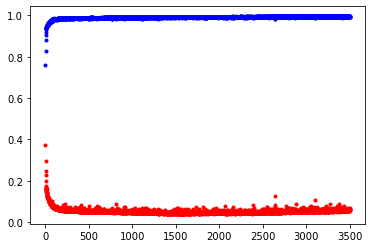

In [133]:
history=model.fit(X,Y,validation_split=0.33,epochs=3500,batch_size=500)

y_vloss=history.history['val_loss']
y_acc=history.history['accuracy']

x_len=np.arange(len(y_acc))
plt.plot(x_len,y_vloss,"o",c="red",markersize=3)
plt.plot(x_len,y_acc,"o",c="blue",markersize=3)
plt.show()